 Name : NITESH JINDAL;
 PG ID : 11915048;
 Individual Assignment -DMG 2 Final Assignment
 #######################################################################

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plots.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # for decision tree- classification case
from sklearn import metrics  # for accuracy computation
from sklearn.model_selection import train_test_split  # splitting dataset in train test data
import math  # for log functions during entropy calculations
from sklearn.preprocessing import StandardScaler # during PCA on MNIST data 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier # for question 5 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  # for converting string values to numeric/ordinal values in column
from sklearn.naive_bayes import MultinomialNB # for naive bayes classifier
from scipy.stats import multivariate_normal # used in gaussian pdf computation on mnist data.
from sklearn.neighbors import KernelDensity as KD  # will be used in parzen window classifier (q5)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used in q 2 for plots.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # for decision tree- classification case
from sklearn import metrics  # for accuracy computation
from sklearn.model_selection import train_test_split  # splitting dataset in train test data
import math  # for log functions during entropy calculations
from sklearn.preprocessing import StandardScaler # during PCA on MNIST data 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier # for question 5 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  # for converting string values to numeric/ordinal values in column
from sklearn.naive_bayes import MultinomialNB # for naive bayes classifier
from scipy.stats import multivariate_normal # used in gaussian pdf computation on mnist data.
from sklearn.neighbors import KernelDensity as KD  # will be used in parzen window classifier (q5)
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PIL import Image
import warnings

import time
#os.getcwd()
from sklearn.svm import SVC
from PIL import Image
import warnings

import time
#os.getcwd()

import time
#os.getcwd()

###  Solution 1 => IRIS - Hierarchical Fisher

* Read the iris data
* Rename column names
* Scatter plot of each feature to observe the distribution of three class labels(i.e. setosa, versicolor, virginica)



   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


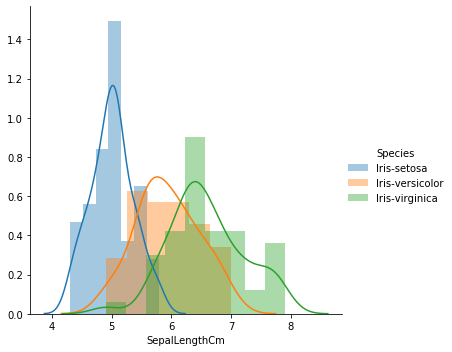

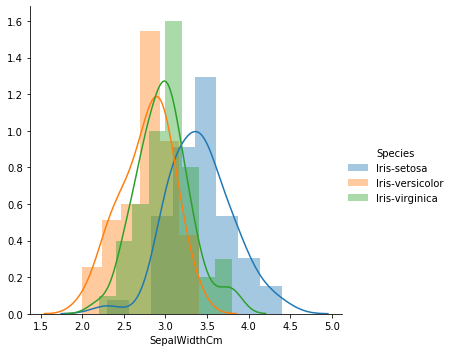

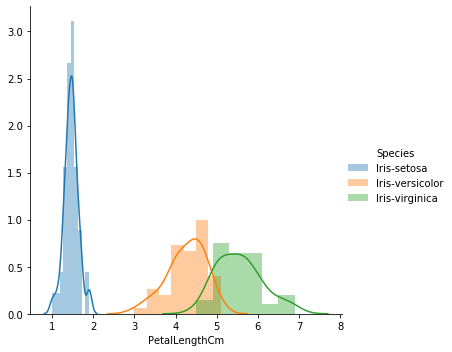

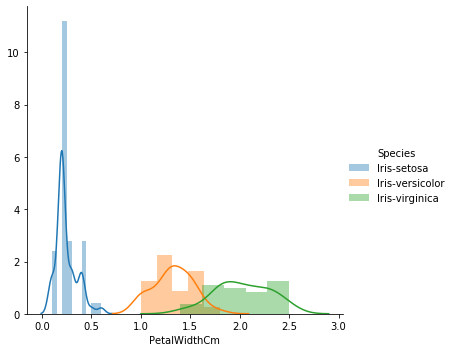

In [3]:
'''1.1 - Find similar classes'''

'Read the iris data'
irisdata = pd.read_csv("iris.data", header = None)

'Rename column names'
irisdata.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

print(irisdata.head())

'Scatter plot between classes '
sns.FacetGrid(irisdata, hue="Species", height=5).map(sns.distplot, "SepalLengthCm").add_legend()
sns.FacetGrid(irisdata, hue="Species", height=5).map(sns.distplot, "SepalWidthCm").add_legend()
sns.FacetGrid(irisdata, hue="Species", height=5).map(sns.distplot, "PetalLengthCm").add_legend()
sns.FacetGrid(irisdata, hue="Species", height=5).map(sns.distplot, "PetalWidthCm").add_legend()

plt.show()

In [4]:
"""Split the data in training and test set for answering further questions -"""
irisdata.head()

predictors_iris = irisdata[irisdata.columns[0:4]].values
response_iris = irisdata['Species']
predictors_train_iris, predictors_test_iris, response_train_iris, response_test_iris = train_test_split(predictors_iris, response_iris, test_size=0.3, random_state=11915048)

print("predictors_train_iris shape:", predictors_train_iris.shape)
print("predictors_test_iris shape:", predictors_test_iris.shape)
print("response_train_iris shape:", response_train_iris.shape)
print("response_test_iris shape:", response_test_iris.shape)

predictors_train_iris shape: (105, 4)
predictors_test_iris shape: (45, 4)
response_train_iris shape: (105,)
response_test_iris shape: (45,)


**1.1 Scatter plot of each feature to observe the distribution of three class labels(i.e. setosa, versicolor, virginica) 

[Observation & Insights:]

Class labels, Iris- virginica and Iris- versicolor are more 'similar' to each other since their distribution partially or completely overlaps over each other for all the four features whereas class Iris-setosa's distribution  discriminates other two classes distribution.


**1.2 Create a meta class combining classes Iris- virginica and Iris- versicolor & rename it as 2.

In [5]:
'''1.2 Create meta class and call it as class2'''

'Rename Iris-setosa as 1. Combine class Iris-versicolor  & Iris-virginica and label both of them as 2'

classval = np.array(response_train_iris.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 2]))
#classval = np.array(irisdata.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 2])) 
type(classval)
print("Class labels corresponding to each 4 dimensional value:\n", classval)
print("\n")

'Store feature/columns values in a variable - features_matrix'
features_matrix  = predictors_train_iris

#features_matrix = irisdata.iloc[:, 0:4].values
print("Features Matrix:\n", features_matrix)

Class labels corresponding to each 4 dimensional value:
 [1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 2 2 1 1 1 2 2 2 1 2
 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 2 1 2 2
 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 1 2 1 1 2 2 2 1 2 2 2 1 2 1 2]


Features Matrix:
 [[5.4 3.7 1.5 0.2]
 [4.9 2.4 3.3 1. ]
 [6.3 2.5 5.  1.9]
 [5.7 2.9 4.2 1.3]
 [4.8 3.1 1.6 0.2]
 [6.7 3.  5.  1.7]
 [5.1 3.7 1.5 0.4]
 [4.4 2.9 1.4 0.2]
 [7.7 2.6 6.9 2.3]
 [5.2 3.4 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.7 3.3 5.7 2.5]
 [5.8 2.7 3.9 1.2]
 [7.7 3.8 6.7 2.2]
 [7.2 3.6 6.1 2.5]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [5.7 3.  4.2 1.2]
 [7.1 3.  5.9 2.1]
 [5.6 2.7 4.2 1.3]
 [6.7 3.  5.2 2.3]
 [6.4 2.9 4.3 1.3]
 [6.8 3.  5.5 2.1]
 [4.8 3.  1.4 0.1]
 [6.9 3.2 5.7 2.3]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.6 0.2]
 [6.3 2.5 4.9 1.5]
 [6.5 3.  5.2 2. ]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [4.3 3.  1.1 0.1]
 [6.8 2.8 4.8 1.4]
 [5.1 2.5 3.  1.1]
 [6.7 3.3 5.7 2.1]
 [4.8 3.4 1.9 0.2]
 [6.7 2.5 5.8 1.8]
 [5.1 

**1.3 Create the first Fisher projection by discriminating class 1 and class 2(remember that class 2 comprises of class labels - Iris-versicolor  & Iris-virginica).
**1.5 Project the test feature data on these two projections and color code class labels.

Mean of both the classes:
 [array([5.04, 3.45, 1.46, 0.24]), array([6.24, 2.85, 4.93, 1.69])]


within class scatter matrix:
 [[36.78 13.5  36.34 13.57]
 [13.5  13.14 13.02  7.22]
 [36.34 13.02 55.8  23.15]
 [13.57  7.22 23.15 14.17]]


between class scatter matrix:
 [[ 34.47 -17.41  99.89  41.56]
 [-17.41   8.79 -50.45 -20.99]
 [ 99.89 -50.45 289.45 120.44]
 [ 41.56 -20.99 120.44  50.12]]

Eigenvector 1: 
[[ 0.13]
 [ 0.8 ]
 [-0.52]
 [-0.28]]
Eigenvalue 1: 1.04e+01

Eigenvector 2: 
[[-0.23]
 [ 0.14]
 [ 0.46]
 [-0.85]]
Eigenvalue 2: 7.28e-15

Eigenvector 3: 
[[-0.15]
 [-0.98]
 [-0.13]
 [ 0.02]]
Eigenvalue 3: 6.18e-18

Eigenvector 4: 
[[-0.09]
 [ 0.98]
 [ 0.16]
 [ 0.1 ]]
Eigenvalue 4: -7.15e-16
Eigenvalue and Eigenvector pairs: 
 [(10.44712737930153, array([ 0.13,  0.8 , -0.52, -0.28])), (7.276626848355403e-15, array([-0.23,  0.14,  0.46, -0.85])), (6.184243374979652e-18, array([-0.15, -0.98, -0.13,  0.02])), (7.154108409816871e-16, array([-0.09,  0.98,  0.16,  0.1 ]))]
[(10.447127379301

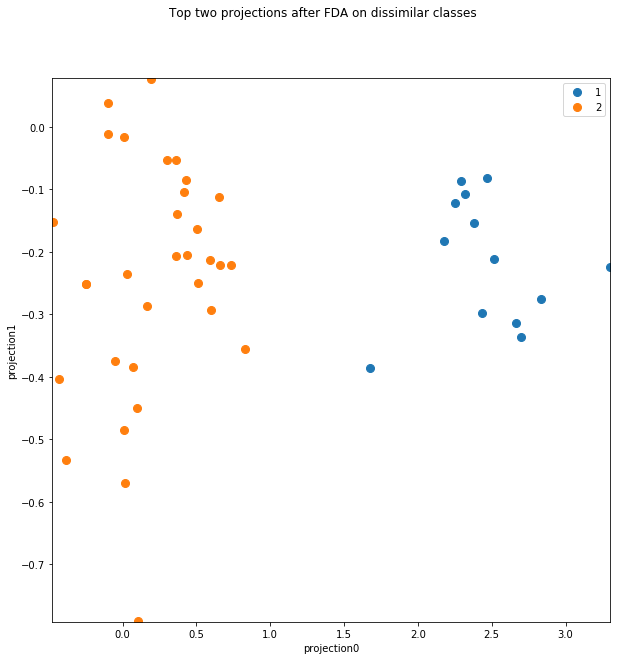

In [64]:
'''1.3 & 1.5 Fisher Discriminant Analysis  on dissimilar classes '''

np.set_printoptions(precision=2, suppress = False)

mean_class = []
for i in range(1,3):
    # mean vector for both the different classes ; axis = 0 refers to colsum
    mean_class.append(np.mean(features_matrix[classval == i], axis = 0))  # 'mean' value  for each of two class label.
    
print("Mean of both the classes:\n",mean_class)
print("\n")


"within class scatter matrices"

within_class_scattermatrix = np.zeros((4,4))  # since we have 4 dimensions

for i, mc in zip(range(1,3), mean_class):                       # range(1,3) since we have two classes i.e. 1, 2.
    scatter_matrix_for_class = np.zeros((4,4))                  # scatter matrix for every class
    for obs in features_matrix[classval == i]:
        obs, mc = obs.reshape(4,1), mc.reshape(4,1)             # make column vectors
        scatter_matrix_for_class += (obs-mc).dot((obs-mc).T)   # (x-mu).dot.Transpose(x-mu) to obtain the scatter matrix for each class
    within_class_scattermatrix += scatter_matrix_for_class      # sum class scatter matrices
    #within class scatter matrix has total variance which is sum of variance from each class.
print("within class scatter matrix:\n",within_class_scattermatrix)


"between class scatter matrices"

#mean of datapoints in each class - mean of entire data 
#mean of entire datapoints comprising class 1 datapoints and class2 datapoints. We can call it as mean of entire data -
overall_mean = np.mean(features_matrix, axis=0)

#initialise 4*4 dimensional scatter matrix with zeros-
between_class_scattermatrix = np.zeros((4,4))

#In below code, list(enumerate(mean_class,0)) = [(0, array([5.01, 3.42, 1.46, 0.24])), (1, array([6.26, 2.87, 4.91, 1.68]))]
# mean_ class is list of 'mean of datapoints' belonging to classes 1 and 2 in a 4 dimensional space.

for i,classmean in enumerate(mean_class,0): 
    # sample size for each class. It will be multiplied while calc between class scatter matrix.
    sample_size = features_matrix[classval==i+1,:].shape[0]   
    classmean = classmean.reshape(4,1) # make column vector of mean vector with shape (4,1)
    overall_mean = overall_mean.reshape(4,1) # make column vector of mean of entire data with shape (4,1)
    between_class_scattermatrix += sample_size * (classmean - overall_mean).dot((classmean - overall_mean).T)
print("\n")
print("between class scatter matrix:\n",between_class_scattermatrix)



"Compute Eigen values & Eigen vectors"
#Fisher projection = (S^-1 * B) which is 4*4 matrix.
eigenval, eigenvect = np.linalg.eig(np.linalg.inv(within_class_scattermatrix).dot(between_class_scattermatrix)) 

#Eigen value has shape (4,1) and eigen vector has shape (4,4). Each eigen vector has corresponding eigen value

for i in range(len(eigenval)):
    ev = eigenvect[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, ev))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eigenval[i]))
    
    

"Sort Eigen value and eigen vector after making their pair"
# eigen value and eigen vector pair - 
ep = [(np.abs(eigenval[i]), eigenvect[:,i]) for i in range(len(eigenval))]
print("Eigenvalue and Eigenvector pairs: \n", ep)
print(ep)
print("\n")

# sort eigen values( eigen values with their respective eigen vector) in descending order -
ep1 = sorted(ep, key=lambda l: l[0], reverse=True)
print("Sorted Eigenvalue and Eigenvector pairs: \n", ep1)

"""Eigen vector with the lowest corresponding eigen value is having minimal information about the distribution.
Therefore, we should drop such eigen vector. 
To do so, we should make eigen value-eigen vector pair and sort them in descending order of eigen values. 
Then, we shall take out first eigen vectors with their corresponding eigen values"""



"four*two dimensional eigen vector matrix which we can say as top two projections"
print("\n")
top_2_eigenvect = np.hstack((ep1[0][1].reshape(4,1), ep1[1][1].reshape(4,1)))  
print("Top two projection: \n", top_2_eigenvect) 


"project the entire test data on these two projections(top two eigen vectors obtained as above)"
lda_entiredata = predictors_test_iris.dot(top_2_eigenvect) # choose predictors_test_iris which is test features set.
print("\n")
print("projected data in two dimensions(LDA1 and LDA2):\n", lda_entiredata)


colnames = []
for i in range(0,2):
    colnames.append("projection" + str(i))

classval_response = np.array(response_test_iris.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 2]))
D1_iris  = pd.DataFrame(data = lda_entiredata, columns = colnames, dtype = None)
D1_iris['classlabel'] = classval_response  # append label column to projected data frame

D1_iris  #  9 projections with last column as label column 

"plot the projected data and label the two classes"

grpbylabel = D1_iris.groupby('classlabel')
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Top two projections after FDA on dissimilar classes')
plt.xlabel('projection0')
plt.ylabel('projection1')
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling
for name, group in grpbylabel:
    ax.plot(group.projection0, group.projection1, marker='o', linestyle='', ms=8, label=name)
ax.legend()

plt.show()





**1.4 Create the first Fisher projection by considering similar classes Iris-versicolor  & Iris-virginica. Label classes as 1 and 2 for simplicity.
**1.5 Project the test feature data on the two projections as a result of above point and color code class labels.

Class labels:
 [1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 2 1 1 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 2 1 1 2]


Features Matrix:
 [[4.9 2.4 3.3 1. ]
 [6.3 2.5 5.  1.9]
 [5.7 2.9 4.2 1.3]
 [6.7 3.  5.  1.7]
 [7.7 2.6 6.9 2.3]
 [4.9 2.5 4.5 1.7]
 [6.7 3.3 5.7 2.5]
 [5.8 2.7 3.9 1.2]
 [7.7 3.8 6.7 2.2]
 [7.2 3.6 6.1 2.5]
 [5.6 3.  4.5 1.5]
 [5.7 3.  4.2 1.2]
 [7.1 3.  5.9 2.1]
 [5.6 2.7 4.2 1.3]
 [6.7 3.  5.2 2.3]
 [6.4 2.9 4.3 1.3]
 [6.8 3.  5.5 2.1]
 [6.9 3.2 5.7 2.3]
 [6.3 2.5 4.9 1.5]
 [6.5 3.  5.2 2. ]
 [6.8 2.8 4.8 1.4]
 [5.1 2.5 3.  1.1]
 [6.7 3.3 5.7 2.1]
 [6.7 2.5 5.8 1.8]
 [6.1 2.8 4.  1.3]
 [5.8 2.6 4.  1.2]
 [6.4 3.1 5.5 1.8]
 [5.5 2.5 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.5 5.  2. ]
 [6.4 2.8 5.6 2.1]
 [6.3 3.4 5.6 2.4]
 [6.5 3.  5.5 1.8]
 [5.8 2.8 5.1 2.4]
 [6.  2.2 5.  1.5]
 [6.1 2.8 4.7 1.2]
 [5.2 2.7 3.9 1.4]
 [6.4 3.2 4.5 1.5]
 [7.9 3.8 6.4 2. ]
 [6.8 3.2 5.9 2.3]
 [6.7 3.1 4.4 1.4]
 [6.  2.2 4.  1. ]
 [6.4 2.7 5.3 1.9]
 [6.7 3.1

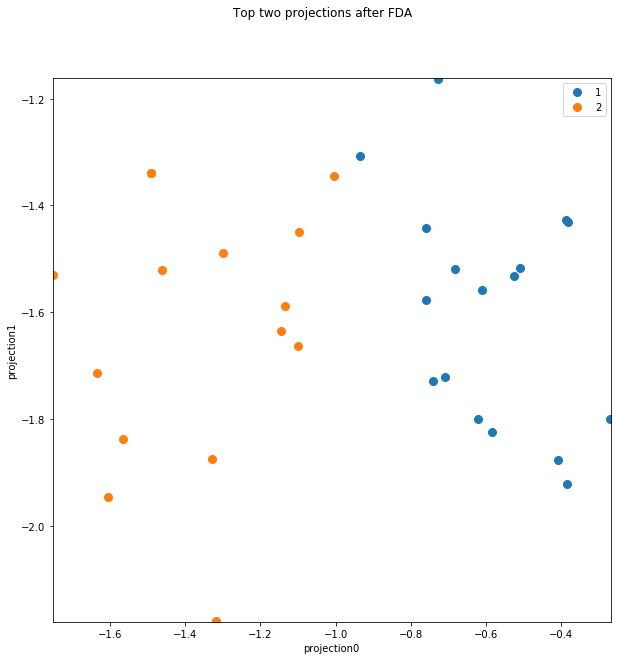

In [65]:
'''1.4 & 1.5 Fisher Discriminant Analysis  on similar classes '''

"prepare data for similar classes"
df = pd.DataFrame(predictors_train_iris, dtype = None).reset_index()
df1 = pd.DataFrame(response_train_iris, dtype = None).reset_index() 
#df.column = 
df2 =pd.concat([df, df1], axis = 1)
df4 = df2.drop(['index', 'index'], axis = 1)
df4.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
similar= df4[(df4['Species'] == 'Iris-versicolor') | (df4['Species'] == 'Iris-virginica')]  # subset data
#similar classes has been labelled as 1 and 2 for easy calculation in below codes.


"subset data to obtain similar class rows & label similar classes as 1 and 2"
classval = np.array(similar.Species.replace(['Iris-versicolor', 'Iris-virginica'], [1, 2]))  # get array of class labels
type(classval)
print("Class labels:\n", classval)
print("\n")



"Store feature/columns values in a variable - features_matrix"

features_matrix_sc = similar.iloc[:, 0:4].values
print("Features Matrix:\n", features_matrix_sc)
print("\n")

np.set_printoptions(precision=2, suppress = False)

mean_class = []
for i in range(1,3):
    # mean vector for both the different classes ; axis = 0 refers to colsum
    mean_class.append(np.mean(features_matrix_sc[classval == i], axis = 0))  # 'mean' value  for each of two class label.
    
print("Mean of both the classes:\n",mean_class)
print("\n")



"within class scatter matrices"

within_class_scattermatrix = np.zeros((4,4))  # since we have 4 dimensions

for i, mc in zip(range(1,3), mean_class):                       # range(1,3) since we have two classes i.e. 1, 2.
    scatter_matrix_for_class = np.zeros((4,4))                  # scatter matrix for every class
    for obs in features_matrix_sc[classval == i]:
        obs, mc = obs.reshape(4,1), mc.reshape(4,1)             # make column vectors
        scatter_matrix_for_class += (obs-mc).dot((obs-mc).T)   # (x-mu).dot.Transpose(x-mu) to obtain the scatter matrix for each class
    within_class_scattermatrix += scatter_matrix_for_class      # sum class scatter matrices
    #within class scatter matrix has total variance which is sum of variance from each class.
print("within class scatter matrix:\n",within_class_scattermatrix)


"between class scatter matrices"

#mean of datapoints in each class - mean of entire data 
#mean of entire datapoints comprising class 1 datapoints and class2 datapoints. We can call it as mean of entire data -
overall_mean = np.mean(features_matrix_sc, axis=0)

#initialise 4*4 dimensional scatter matrix with zeros-
between_class_scattermatrix = np.zeros((4,4))

#In below code, list(enumerate(mean_class,0)) = [(0, array([5.01, 3.42, 1.46, 0.24])), (1, array([6.26, 2.87, 4.91, 1.68]))]
# mean_ class is list of 'mean of datapoints' belonging to classes 1 and 2 in a 4 dimensional space.

for i,classmean in enumerate(mean_class,0): 
    # sample size for each class. It will be multiplied while calc between class scatter matrix.
    sample_size = features_matrix_sc[classval==i+1,:].shape[0]   
    classmean = classmean.reshape(4,1) # make column vector of mean vector with shape (4,1)
    overall_mean = overall_mean.reshape(4,1) # make column vector of mean of entire data with shape (4,1)
    between_class_scattermatrix += sample_size * (classmean - overall_mean).dot((classmean - overall_mean).T)
print("\n")
print("between class scatter matrix:\n",between_class_scattermatrix)



"Compute Eigen values & Eigen vectors"
#Fisher projection = (S^-1 * B) which is 4*4 matrix.
eigenval, eigenvect = np.linalg.eig(np.linalg.inv(within_class_scattermatrix).dot(between_class_scattermatrix)) 

#Eigen value has shape (4,1) and eigen vector has shape (4,4). Each eigen vector has corresponding eigen value

for i in range(len(eigenval)):
    ev = eigenvect[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, ev))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eigenval[i]))
    
    

"Sort Eigen value and eigen vector after making their pair"
# eigen value and eigen vector pair - 
ep = [(np.abs(eigenval[i]), eigenvect[:,i]) for i in range(len(eigenval))]
print("Eigenvalue and Eigenvector pairs: \n", ep)
print(ep)
print("\n")

# sort eigen values( eigen values with their respective eigen vector) in descending order -
ep1 = sorted(ep, key=lambda l: l[0], reverse=True)
print("Sorted Eigenvalue and Eigenvector pairs: \n", ep1)

"""Eigen vector with the lowest corresponding eigen value is having minimal information about the distribution.
Therefore, we should drop such eigen vector. 
To do so, we should make eigen value-eigen vector pair and sort them in descending order of eigen values. 
Then, we shall take out first eigen vectors with their corresponding eigen values"""



"four*two dimensional eigen vector matrix which we can say as top two projections"
print("\n")
top_2_eigenvect = np.hstack((ep1[0][1].reshape(4,1), ep1[1][1].reshape(4,1)))  
print("Top two projection: \n", top_2_eigenvect) 



"prepare test data in same form as was in train data- filter data rows  to obtain two similar class data"
df_test = pd.DataFrame(predictors_test_iris, dtype = None).reset_index()
df1_test = pd.DataFrame(response_test_iris, dtype = None).reset_index()  
df2_test = pd.concat([df_test, df1_test], axis = 1)
df4_test = df2_test.drop(['index', 'index'], axis = 1)
df4_test.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
similar_test = df4_test[(df4_test['Species'] == 'Iris-versicolor') | (df4_test['Species'] == 'Iris-virginica')]  # subset data

similar_test_features = similar_test[similar_test.columns[0:4]].values
similar_test_response = np.array(similar_test['Species'].replace(['Iris-versicolor', 'Iris-virginica'], [1, 2]))


"project the entire test data on the above two projections(top two eigen vectors obtained as above)"

lda_entiredata =similar_test_features.dot(top_2_eigenvect) # choose similar class data features set.
print("\n")
print("projected data in two dimensions(LDA1 and LDA2):\n", lda_entiredata)


colnames = []
for i in range(0,2):
    colnames.append("projection" + str(i))


D11_iris  = pd.DataFrame(data = lda_entiredata, columns = colnames, dtype = None)
D11_iris['classlabel'] = similar_test_response  # append label column to projected data frame on test data.
print("\n")
print("Projected Data Frame after LDA:\n", D11_iris)



"""Note that that the projected data(i.e. projections on test data) is a result of considering two similar classes
('Iris-versicolor' and 'Iris-virginica') with label 1 and 2 respectively.
""" 

print("\n")



"plot the projected data and label the two classes"
grpbylabel = D11_iris.groupby('classlabel')
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Top two projections after FDA')
plt.xlabel('projection0')
plt.ylabel('projection1')
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling
for name, group in grpbylabel:
    ax.plot(group.projection0, group.projection1, marker='o', linestyle='', ms=8, label=name)
ax.legend()

plt.show()



[Observation & Insights:]

Class seperation is more in case where we considered two dissimilar classes whereas class seperation is less(classes are closer in linear space) where we considered two similar classes.('iris-Versicolor' & 'iris -Virginica'). Same we observed in actual data wherein we plotted scatter plot between classes.


###  Solution 2 => Mushroom Data Information Gain 

In [66]:
'''2.1, 2.2 find best feature using the three purity measaures- accuracy, gini index & entropy'''

'Read the mushroom data'
md = pd.read_csv("agaricus-lepiota.data", header = None)


# Dataset contains 23 species of gilled mushrooms in the Agaricus and Lepiota Family
# Classes are edible represented as "e" and poisonous represented as "p" in 0th column.
# Shape of dataset is (8124 observations with 23 features(including class feature))

# Get column names from the provided file 'agaricus-lepiota.names' -
md.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [67]:
print("Top 5 rows of mushroom data:\n",md.head(2))
print("\n")
print("shape of mushroom data:\n", md.shape)

Top 5 rows of mushroom data:
   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  

[2 rows x 23 columns]


shape of mushroom data:
 (8124, 23)


In [68]:
"Best Feature using Purity measure = Accuracy"

list_accuracy_measure = [0.00] 
for i in range(1,23):
    crosstable = pd.crosstab(md.iloc[:,i], md['class'])  # cross table between feature "class" and other feature
    # sum column will contain total observations belonging to a category for a feature.
    crosstable['sum'] = crosstable.sum(axis = 1)  
    # to which class(e or p), feature category contains shares maximum number of data points.
    crosstable['max_e_p'] = crosstable[["e", "p"]].max(axis=1) 
    crosstable['accuracy'] = crosstable['max_e_p']/crosstable['sum'] 
    wt_accuracy_measure = 0
    for i in range(crosstable.shape[0]):
        wt_accuracy_measure = wt_accuracy_measure + (crosstable['sum'][i]/md.shape[0])*crosstable['accuracy'][i]
    list_accuracy_measure.append(wt_accuracy_measure)
    
accuracy_ind = pd.DataFrame(list(zip(md.columns, list_accuracy_measure)), columns =['feature_name', 'weighted_accuracy_measure'])
accuracy_ind  = accuracy_ind.iloc[1:]


print("Accuracy Purity Measures:\n",accuracy_ind) 


print("\n")
print("Crosstable between 'habitat' and 'class' feature:\n",crosstable)
print("\n")
print("best feature as per accuracy purity measure is:")
accuracy_ind.loc[accuracy_ind['weighted_accuracy_measure'].idxmax()]

Accuracy Purity Measures:
                 feature_name  weighted_accuracy_measure
1                  cap-shape                   0.564254
2                cap-surface                   0.580502
3                  cap-color                   0.595273
4                    bruises                   0.743968
5                       odor                   0.985229
6            gill-attachment                   0.517971
7               gill-spacing                   0.615953
8                  gill-size                   0.756278
9                 gill-color                   0.805022
10               stalk-shape                   0.552930
11                stalk-root                   0.645987
12  stalk-surface-above-ring                   0.774495
13  stalk-surface-below-ring                   0.766125
14    stalk-color-above-ring                   0.716396
15    stalk-color-below-ring                   0.714426
16                 veil-type                   0.517971
17                vei

feature_name                     odor
weighted_accuracy_measure    0.985229
Name: 5, dtype: object

Considering purity measure: accuracy -> 
Best feature is the one whose accuracy measure is highest. Since the feature with high accuracy value would be more pure comparitive to feature with lower accuracy value

Feature name "odor" gets the maximum accuracy value. Gini index value  = 0.9852. Hence, it is the best feature to split considering the accuracy as purity measure.

In [69]:
"Best feature using Purity measure = Gini Index"

list_gini_measure = [0.00] 
for i in range(1,23):
    crosstable = pd.crosstab(md.iloc[:,i], md['class'])
    crosstable['sum'] = crosstable.sum(axis = 1)
    crosstable['prob_e'] = round(crosstable['e']/crosstable['sum'],2)
    crosstable['prob_p'] = round(crosstable['p']/crosstable['sum'],2)
    crosstable['ginimeasure'] = round((crosstable['prob_e']*crosstable['prob_e'] + crosstable['prob_p']*crosstable['prob_p']),4)
    weighted_gini_measure = 0
    for i in range(crosstable.shape[0]):
        weighted_gini_measure = weighted_gini_measure + (crosstable['sum'][i]/md.shape[0])*crosstable['ginimeasure'][i]
    list_gini_measure.append(weighted_gini_measure)

giniindex = pd.DataFrame(list(zip(md.columns, list_gini_measure)), columns =['feature_name', 'weighted_gini_measure'])
giniindex  = giniindex.iloc[1:]
print("Gini Index Measures:\n",giniindex) 


print("\n")
print("Crosstable between 'habitat' and 'class' feature:\n",crosstable)
print("\n")
print("best feature as per gini index purity measure is:")
giniindex.loc[giniindex['weighted_gini_measure'].idxmax()]

Gini Index Measures:
                 feature_name  weighted_gini_measure
1                  cap-shape               0.529894
2                cap-surface               0.519603
3                  cap-color               0.523898
4                    bruises               0.627303
5                       odor               0.974726
6            gill-attachment               0.508885
7               gill-spacing               0.560332
8                  gill-size               0.649324
9                 gill-color               0.731633
10               stalk-shape               0.505469
11                stalk-root               0.583080
12  stalk-surface-above-ring               0.672021
13  stalk-surface-below-ring               0.667363
14    stalk-color-above-ring               0.638271
15    stalk-color-below-ring               0.633836
16                 veil-type               0.500800
17                veil-color               0.512504
18               ring-number              

feature_name                 odor
weighted_gini_measure    0.974726
Name: 5, dtype: object

Best feature is the one whose gini index measure is highest. Since the feature with high gini index value would be more pure comparitive to feature with lower gini index  value.
Feature name "odor" gets the maximum gini index value. Gini index value  = 0.9747. Hence, it is the best feature to split considering the gini index as purity measure.

As we know that in best case gini index measure = accuracy measure. In both cases, we obtained feature "odor" as best.

In [70]:
"Best Feature using Purity measure = Entropy"

"""
Step 1 - compute entropy for feature 'class'. 
Note that the entropy of feature 'class' would be helpful during calculations of information gain- 
"""


value_e = md['class'].value_counts()[0] /md.shape[0] # proportion of category "e" in feature 'class'
value_p = md['class'].value_counts()[1] /md.shape[0] # proportion of category "p" in feature 'class'

"""
Since, log base should be the number of categories a feature can take. And the number of unique 
categories in feature 'class' is 2. Therefore,base_class = 2 for feature 'class'. -
"""

base_class = len(md.iloc[:,0].unique())   # len(md.iloc[:,0].unique()) = 2


"""
Use log function of  math class for log computations below-

"""

entropy_class = -value_e*math.log(value_e, base_class) - value_p*math.log(value_p, base_class)
entropy_class

0.9990678968724604

In [71]:

"2.3 Information gain by splitting on feature & Purity Table with Accuracy, Gini Index and 1-entropy"

list_infogain_features = [0.00] 

for j in range(1, len(md.columns)):  # iterate over all columns/features.
    wt_entropy = 0
    entropy_cls_feature= 0
    # i refers to categories within a feature i.e. iteration over all categories of a feature.
    for i in range(len(md.iloc[:,j].unique())):
        test = md[md.iloc[:,j] == md.iloc[:,j].unique()[i]]  # subset feature's category data.
        # choose log base as k which is number of categories the feature can take.
        logbase = len(md.iloc[:,j].unique())
        # since for feature 'veil_type', we observe only one unique category and hence logbase =1.
        #Dividing with log1 gives 'Zero Division Error'. Use ifelse to treat 'Zero Division Error' error.
        if logbase == 1:  
            logbase = 2
        else:
            logbase = logbase

        if len(test['class'].unique()) > 1:
            val_e_featurecatg = test['class'].value_counts()[0]/test.shape[0]
            val_p_featurecatg = test['class'].value_counts()[1]/test.shape[0]
            entropy_feature = -(val_e_featurecatg)*math.log(val_e_featurecatg,logbase)- val_p_featurecatg*math.log(val_p_featurecatg,logbase)
            entropy_cls_feature += entropy_feature
            wt_entropy += (test.shape[0]/md.shape[0])*entropy_feature
        else:
            entropy_feature = 0
            entropy_cls_feature += entropy_feature
            wt_entropy += (test.shape[0]/md.shape[0])*entropy_feature
            # since entropy  = 0 for pure category. All datapoints in a category belongs to same class label(either p or e).

    infogain_feature = 1 - wt_entropy  # info gain = 1- wt.entropy
    list_infogain_features.append(infogain_feature)

infogain = pd.DataFrame(list(zip(md.columns, list_infogain_features)), columns =['feature_name', 'infogain_feature'])
infogain  = infogain.iloc[1:]
print("Infogain Measures of features:\n",infogain)
print("\n")
print("best feature as per infogain measure is:")
print(infogain.loc[infogain['infogain_feature'].idxmax()])


purity_table = pd.DataFrame(list(zip(md.columns, list_infogain_features, list_gini_measure, list_accuracy_measure)), columns =['feature_name', 'infogain', 'gini_index', 'accuracy'])
print("\n")
print("Purity Table:\n", purity_table)
    

Infogain Measures of features:
                 feature_name  infogain_feature
1                  cap-shape          0.632385
2                cap-surface          0.514761
3                  cap-color          0.710103
4                    bruises          0.193312
5                       odor          0.970664
6            gill-attachment          0.015097
7               gill-spacing          0.101815
8                  gill-size          0.231086
9                 gill-color          0.837630
10               stalk-shape          0.008449
11                stalk-root          0.627788
12  stalk-surface-above-ring          0.642829
13  stalk-surface-below-ring          0.636413
14    stalk-color-above-ring          0.764908
15    stalk-color-below-ring          0.760987
16                 veil-type          0.000932
17                veil-color          0.512375
18               ring-number          0.393919
19                 ring-type          0.706689
20         spore-print-color

Best feature is the one whose information gain is highest and that is 'odor' with an information gain = 97.06%.

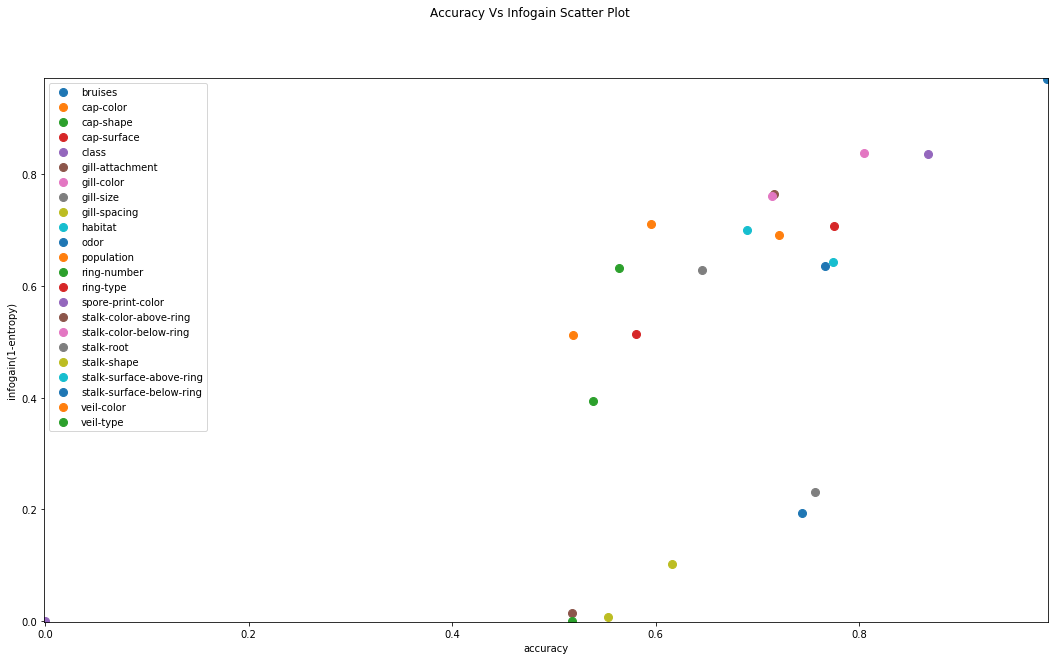

In [72]:
"2.4 Accuracy Vs 1-Entropy(i.e. Infogain) Scatter Plot"

grpbylabel = purity_table.groupby('feature_name')
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Accuracy Vs Infogain Scatter Plot')
plt.xlabel('accuracy')
plt.ylabel('infogain(1-entropy)')
ax.margins(0.001) # Optional, just adds 5% padding to the autoscaling
for name, group in grpbylabel:
    ax.plot(group.accuracy, group.infogain, marker='o', linestyle='', ms=8, label=name)
ax.legend()

plt.show()

### Solution 3 => Mushroom Data NB/DT

Mushroom Dataset top two rows:
   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  

[2 rows x 23 columns]
   class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1            0            0   

C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy Measure:
     train_accuracy  test_accuracy
4         1.000000       1.000000
8         1.000000       1.000000
12        1.000000       1.000000
16        1.000000       1.000000
20        1.000000       1.000000
24        1.000000       1.000000
28        1.000000       1.000000
32        1.000000       1.000000
36        1.000000       1.000000
40        1.000000       1.000000
44        0.998065       0.997949
48        0.998065       0.997949
52        0.998065       0.997949
56        0.998065       0.997949
60        0.998065       0.997949
64        0.998065       0.997949


best sizethreshold after which test accuracies starts to decrease:
 40


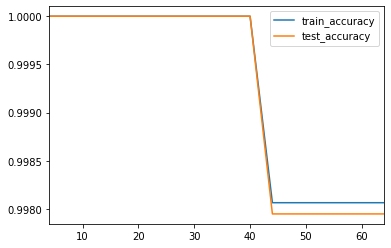

In [73]:
'''3.1, 3.2, 3.3, 3.4 For Decision Tree Classifier'''


"Read the mushroom data and assign feature names"

md = pd.read_csv("agaricus-lepiota.data", header = None)

# Dataset contains 23 species of gilled mushrooms in the Agaricus and Lepiota Family
# Classes are edible represented as "e" and poisonous represented as "p" in 0th column.
# Shape of dataset is (8124 observations with 23 features(including class feature))

# Get column names from the provided file 'agaricus-lepiota.names' -
md.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
print("Mushroom Dataset top two rows:\n", md.head(2))



"One hot encoding for predictors and label encoding for 'class' feature"

# one hot encoding for predictors.
X = md[md.columns[1:]] 
y = md[md.columns[0:1]]
categorical_predictors = pd.get_dummies(X)  

from sklearn.preprocessing import LabelEncoder  # Label encoding for response variable - class.
le = LabelEncoder() 
y= le.fit_transform(y)
y = pd.DataFrame(y)

md1 = y.join(categorical_predictors)
md1=md1.rename(columns = {0:'class'}) # rename column 0 name with 'class'
print(md1.head(2))



"split data column wise & generate predictors values array and response feature"

predictors = md1[md1.columns[1:]].values
response = md1['class']


"split in train and test data. use random state = pg id 11915048, test size = 30%; train size = 70%"
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size=0.3, random_state=11915048)

print("predictors_train shape:", predictors_train.shape)
print("predictors_test shape:", predictors_test.shape)
print("response_train shape:", response_train.shape)
print("response_test shape:", response_test.shape)


"generate sizeThreshold and iterate over each value of sizeThreshold hyperparameter"
sizethreshold = []
for i in range(1,17):
    sizethreshold.append(4*i) # it will generate a list of sizeThreshold with multiple of 4. [4,8,12,16,...60,64]

"tune for all values of sizeThreshold hyperparameter & get the accuracy on train data and test data."

#Size Threshold considered as 4,8,12,16,...64..
test_accuracy = []
train_accuracy = []
for i in sizethreshold:
    dt_classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=i)
    dt_classifier.fit(predictors_train,response_train)
    response_predicted = dt_classifier.predict(predictors_test) # predict on test data
    test_acc = metrics.accuracy_score(response_test,response_predicted)
    test_accuracy.append(test_acc)  # test accuracy
    predictors_predicted = dt_classifier.predict(predictors_train) # predict on train data
    train_acc =metrics.accuracy_score(response_train, predictors_predicted) 
    train_accuracy.append(train_acc) # train accuracy
    
dt_accuracy_measure = pd.DataFrame({'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}, index = sizethreshold)
print("Decision Tree Accuracy Measure:\n", dt_accuracy_measure) 
print("\n")
#Index number in dataframe is sizeThreshold value.

"line plot-> x = sizeThreshold; y = train data accuracy , test data accuracy"
dt_accuracy_measure.plot.line()



"sizeThreshold hyper-parameter value where test accuracies starts to decrease"
dt_accuracy_measure['testdummy'] = dt_accuracy_measure['test_accuracy'].diff()
dt_bestindex = dt_accuracy_measure[dt_accuracy_measure['testdummy'] == dt_accuracy_measure['testdummy'].min()].index-4

print("best sizethreshold after which test accuracies starts to decrease:\n", dt_bestindex[0])
#


[Observation & Insights:]

best index = 40 post which test accuracies starts to decrease.


C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


md_nb top few 5 rows:
    class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  

[2 rows x 23 columns]


predictors_train_nb shape: (5686, 22)
predictors_test_nb shap

''

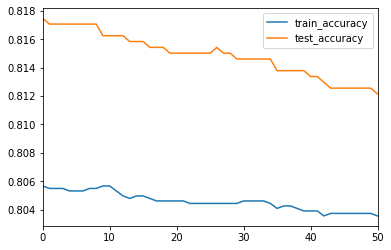

In [74]:
'''3.1, 3.2, 3.3, 3.4 For Naive bayes classifier'''



md = pd.read_csv("agaricus-lepiota.data", header = None)
md.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
md.head(2)


"Encode strings to numeric values for features."

X_nb = md[md.columns[1:]] 
y_nb = md[md.columns[0:1]]
X_nb_cols = list(X_nb.columns)
le = LabelEncoder() 

X_nb[X_nb_cols] = X_nb[X_nb_cols].apply(lambda x_nb_col: le.fit_transform(x_nb_col))
y_nb = le.fit_transform(y_nb)
y_nb = pd.DataFrame(y_nb)

"join two dataframes and name it as md_nb containing all string converted to numeric values"
md_nb = y_nb.join(X_nb)
md_nb=md_nb.rename(columns = {0:'class'}) # rename column 0 name with 'class'
print("md_nb top few 5 rows:\n", md_nb.head(2))



"split data column wise & generate predictors values array and response feature"
predictors_nb = md_nb[md_nb.columns[1:]].values
response_nb = md_nb['class']

"split in train and test data. use random state = pg id 11915048, test size = 30%; train size = 70%"
predictors_train_nb, predictors_test_nb, response_train_nb, response_test_nb = train_test_split(predictors_nb, response_nb, test_size=0.3, random_state=11915048)

print("\n")
print("predictors_train_nb shape:", predictors_train_nb.shape)
print("predictors_test_nb shape:", predictors_test_nb.shape)
print("response_train_nb shape:", response_train_nb.shape)
print("response_test_nb shape:", response_test_nb.shape)


"generate lambda ranging from 0 to 50"
lambda_hyperparameter= []
for i in range(51):
    lambda_hyperparameter.append(i) # it will generate a list of lambda values ranging from 0 to 50.
lambda_hyperparameter

"obtain train and test accuracies"
test_accuracy_nb = []
train_accuracy_nb = []
for l in lambda_hyperparameter:
    nb_classifier = MultinomialNB(alpha= l, fit_prior=True, class_prior=None)
    nb_classifier.fit(predictors_train_nb, response_train_nb)
    response_predicted_nb = nb_classifier.predict(predictors_test_nb) # predict on test data
    test_acc_nb = metrics.accuracy_score(response_test_nb,response_predicted_nb)
    test_accuracy_nb.append(test_acc_nb)  # test accuracy
    predictors_predicted_nb = nb_classifier.predict(predictors_train_nb) # predict on train data
    train_acc_nb =metrics.accuracy_score(response_train_nb, predictors_predicted_nb) 
    train_accuracy_nb.append(train_acc_nb) # train accuracy
    
nb_accuracy_measure = pd.DataFrame({'train_accuracy': train_accuracy_nb, 'test_accuracy': test_accuracy_nb}, index = lambda_hyperparameter, copy = False)
print(nb_accuracy_measure) 
print("\n")


"line plot-> x = lambda; y = train data accuracy , test data accuracy"
nb_accuracy_measure.plot.line()


"lambda value where test accuracies starts to decrease"
nb_accuracy_measure['testdummy'] = nb_accuracy_measure['test_accuracy'].diff()
nb_bestlambda = nb_accuracy_measure[nb_accuracy_measure['testdummy'] == nb_accuracy_measure['testdummy'].min()].index

print("best lambda after which test accuracies starts to decrease:\n", nb_bestlambda[0]-1)
''''''
#best lambda index = 8 post which test accuracies starts to decrease.

"3.5 Points after comparing accuracies of both classifier"

[Observation & Insights:]
As we increase the lambda hyper parameter value(i.e. smoothing parameter), accuracy goes gradually down .
Reason is -- lambda parameter increases overall value in denominator part while computing the probability of datapoint given class ( in conditional probability part).And the lambda values saves from being  probability as zero. 

Comparing accuracies of Decision Tree and Naive Bayes on Mushroom data, we find that decision tree classifier yields better accuracies as compared to Naive Bayes algorithm. 
As the size threshold increases in Decision tree classifier, accuracy starts to drop down since higher sizethreshold will result in reduced tree size and thus  reduces the purity in nodes.
Naive Bayes algorithm performs poor since it could not handle complexities in data very well i.e. large number of features because the likelihood would be distributed and also naive bayes assumes dependency among features and that if not present disturbs the accurary resulting in poor accuracy.

### Solution 4 => MNIST Bayesian

In [75]:
''' 3.1, 3.2 & 3.4 Construct dataframe D1: 9 dimensional PCA projection on MNIST data.then build a bayesian classifier'''


"Load MNIST data and perform PCA (784 dimensions to 9 dimensions projected dataframe)"

data = pd.read_csv("train.csv") # import digits data
print("Top few rows of dataset:\n", data.head())

label_in_data= data['label']
dataval= data.drop(["label"], axis =1)


"perform scaling on the faetures and compute eigen values and eigen vectors"
scaledfeature = StandardScaler(copy=True, with_mean=True).fit_transform(dataval)  # shape is (4684, 784)
cvmat = np.cov(scaledfeature, rowvar = False, bias = False )
eigenva, eigenve = np.linalg.eig(cvmat) # input to linalg.eig() from numpy module is square array which is covariance matrix in our case
pairs_eigva_eigve = [(np.abs(eigenva[k]), eigenve[:,k]) for k in range(len(eigenva))] # create pairs of eigenvalue and eigenvectors
sorting_eig_pairs =sorted(pairs_eigva_eigve, key=lambda eigva: eigva[0], reverse=True) 

stackedcomp = np.hstack((sorting_eig_pairs[0][1].reshape(784,1), sorting_eig_pairs[1][1].reshape(784,1),
                           sorting_eig_pairs[2][1].reshape(784,1), sorting_eig_pairs[3][1].reshape(784,1),
                           sorting_eig_pairs[4][1].reshape(784,1), sorting_eig_pairs[5][1].reshape(784,1),
                           sorting_eig_pairs[6][1].reshape(784,1), sorting_eig_pairs[7][1].reshape(784,1),
                           sorting_eig_pairs[8][1].reshape(784,1)))   


"projected data"
projecteddata = scaledfeature.dot(stackedcomp)  # dot product of projections with originial scaled data

colnames = []
for i in range(0,9):
    colnames.append("projection" + str(i))

D1  = pd.DataFrame(data = projecteddata, columns = colnames, dtype = None)
D1['label'] = label_in_data  # append label column to projected data frame

D1.head(2)  #  9 projections with last column as label column 


""" 
Build a bayesian classifier on D1 - Case1 -> Full  Covariance Matrix(non diagonal elements are kept zero)

"""


## CONSIDERING FULL COVARIANCE MATRIX -

"Part 1- split D1 in train and test datasets & also seperate the explanatory dimensions from class label feature."

X_gnb_D1 = D1.drop('label', axis=1) # entire data excluding class labels.
y_gnb_D1 =  D1['label'] # entire data with class labels only.
X_gnb_D1_train, X_gnb_D1_test, y_gnb_D1_train, y_gnb_D1_test = train_test_split(X_gnb_D1, y_gnb_D1, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_gnb_D1_train (predictors in train data):", X_gnb_D1_train.shape)
print("shape of X_gnb_D1_test (predictors in test data):", X_gnb_D1_test.shape)
print("shape of y_gnb_D1_train (response in train data):", y_gnb_D1_train.shape)
print("shape of y_gnb_D1_test (response in test data):", y_gnb_D1_test.shape)


"Part 2 - compute prior probabilities [i.e. P(c) which is probability of each class label from 0 to 9]"

c = y_gnb_D1_train.value_counts().to_dict() # we want to compute proportion of each class label in train data
print("Class labels data size in train data:\n", c.items())
#print(c[0], c[1])  # c[0] = 0, c[1] = 1..  which are class labels.
prior_prob = np.ones(10) # 10 since we have 10 class labels in our data.
for i in range(10):
    prior_prob[i] = c[i]/y_gnb_D1_train.shape[0]  #proportion of each class in training data(in ascending order).

prior_prob_list = list(prior_prob)
print("Prior Probabilities are:\n", prior_prob_list) # these are the prior probabilities of each class label . i.e. p(c1), p(c2).. p(c10) since we have 10 classes.
#prior_prob.sum()  # sum should be equal to 1.0


"Part 3- create function to form the gaussian distribution per class"

# compute mean and variance of each class and generate distribution.
# mean array of each class is in 9 dimensions
# covariance matrix  of each class is of 9*9 shape.
# Function returns frozen object which contains mean and covariance of a particular class.

def normdist(data):  # Data with 9 features.
    var = np.cov(data.T)  # to compute covariance, we need to horizontally stack variables.
    mean_array = []
    for i in range(D1.shape[1]-1): # d1.shape-1 -> since we have 9 features. loop will run 9 times and calc mean.
        mu = np.mean(data[:,i])
        mean_array.append(mu)
    ma = np.array(mean_array)
    #print("Mean array:\n", ma)
    #print("Variance of X_class:\n", var)
    distribution = multivariate_normal(ma, var)
    return distribution


"Part 4- convert train and test datasets to arrays  which will be consumed in further steps during predictions"
X_gnb_D1_train_arr = np.array(X_gnb_D1_train) # convert train data to array
y_gnb_D1_train_arr = np.array(y_gnb_D1_train)

X_gnb_D1_test_arr = np.array(X_gnb_D1_test)
y_gnb_D1_test_arr = np.array(y_gnb_D1_test)


"Part 5- predict on train and test data sets"

'predicted values for each observation in training data corresponding to all class labels. '
'if a particular class has the highest predicted value for new observation, the new example is assigned that class label'

labels = sorted(list(c.keys())) 
# 'c' is a dictionary with keys are the class labels(0 to 9) and value is sample size count per class

predictedvalues_traindata = pd.DataFrame() # store the predicted values from all the classes
predictedvalues_testdata = pd.DataFrame()
for i in range(D1.shape[1]):
    X_class = np.array(X_gnb_D1_train[y_gnb_D1_train == labels[i]]) # subset on  basis of class label
    print(i)
    norm_dist = normdist(X_class) # call normdist() function to retreive mean and covariance of a particular class labelled data in frozen object.
    predictions_class = prior_prob_list[i]*norm_dist.pdf(X_gnb_D1_train_arr) # array of train data
    predictions_class1 = prior_prob_list[i]*norm_dist.pdf(X_gnb_D1_test_arr) # array of test data
    predictedvalues_traindata = pd.concat([predictedvalues_traindata, pd.DataFrame(predictions_class)], axis = 1)
    predictedvalues_testdata = pd.concat([predictedvalues_testdata, pd.DataFrame(predictions_class1)], axis = 1)
    
    
"Part 6- Rename column names of the dataframes which consists of predicted probabilities of a new observation in all the 10 classes"

predictedvalues_traindata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_traindata = predictedvalues_traindata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("Max values(predicted labels) of top few observation in train data are:\n", predictedvalues_traindata[0:10])

predictedvalues_testdata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_testdata = predictedvalues_testdata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in test data are:\n", predictedvalues_testdata[0:10])




"Part 7 - Accuracy Measurements"

#list(predictedvalues_traindata)
#list(y_gnb_D1_train)
#predictedvalues_testdata
#pd.concat([predictedvalues_traindata, y_gnb_D1_train], axis=1)
#train data accuracy-
trainaccuracy_gnb_D1 = pd.DataFrame(list(zip(list(predictedvalues_traindata), list(y_gnb_D1_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
trainaccuracy_gnb_D1['predictedval_traindata'] = trainaccuracy_gnb_D1['predictedval_traindata'].astype(int)
#trainaccuracy_gnb_D1 = trainaccuracy_gnb_D1.convert_objects(convert_numeric=True)
trainaccuracy_gnb_D1
trueevents = trainaccuracy_gnb_D1[trainaccuracy_gnb_D1.apply(lambda x: min(x) == max(x), 1)] # Take out rows where values in a row are same for all the columns. 
traindata_accuracy = (trueevents.shape[0]/y_gnb_D1_train.shape[0])*100
print("Accuracy on train data is:\n", str(traindata_accuracy) + " %")


#test data accuracy-
testaccuracy_gnb_D1 = pd.DataFrame(list(zip(list(predictedvalues_testdata), list(y_gnb_D1_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
testaccuracy_gnb_D1['predictedval_testdata'] = testaccuracy_gnb_D1['predictedval_testdata'].astype(int)
trueevents1 = testaccuracy_gnb_D1[testaccuracy_gnb_D1.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns.
testdata_accuracy = (trueevents1.shape[0]/y_gnb_D1_test.shape[0])*100
print("Accuracy on test data is:\n", str(testdata_accuracy) + " %")


"""
Build a bayesian classifier on D1 - Case2 -> Diagonal Covariance Matrix(non diagonal elements are kept zero)

"""

### Considering Diagonal Covariance Matrix -

"Part 1- split D1 in train and test datasets & also seperate the explanatory dimensions from class label feature."

X_gnb_D1 = D1.drop('label', axis=1) # entire data excluding class labels.
y_gnb_D1 =  D1['label'] # entire data with class labels only.
X_gnb_D1_train, X_gnb_D1_test, y_gnb_D1_train, y_gnb_D1_test = train_test_split(X_gnb_D1, y_gnb_D1, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_gnb_D1_train (predictors in train data):", X_gnb_D1_train.shape)
print("shape of X_gnb_D1_test (predictors in test data):", X_gnb_D1_test.shape)
print("shape of y_gnb_D1_train (response in train data):", y_gnb_D1_train.shape)
print("shape of y_gnb_D1_test (response in test data):", y_gnb_D1_test.shape)


"Part 2 - compute prior probabilities [i.e. P(c) which is probability of each class label from 0 to 9]"

c = y_gnb_D1_train.value_counts().to_dict() # we want to compute proportion of each class label in train data
print("Class labels data size in train data:\n", c.items())
#print(c[0], c[1])  # c[0] = 0, c[1] = 1..  which are class labels.
prior_prob = np.ones(10) # 10 since we have 10 class labels in our data.
for i in range(10):
    prior_prob[i] = c[i]/y_gnb_D1_train.shape[0]  #proportion of each class in training data(in ascending order).

prior_prob_list = list(prior_prob)
print("Prior Probabilities are:\n", prior_prob_list) # these are the prior probabilities of each class label . i.e. p(c1), p(c2).. p(c10) since we have 10 classes.
#prior_prob.sum()  # sum should be equal to 1.0


"Part 3- create function to form the gaussian distribution per class"
# compute mean and variance of each class and generate distribution.
# mean array of each class is in 9 dimensions
# covariance matrix  of each class is of 9*9 shape.
# Function returns frozen object which contains mean and covariance of a particular class.

def normdist(data):  # Data with 9 features.
    var = np.cov(data.T)  # to compute covariance, we need to horizontally stack variables.
    var = np.diag(np.diag(var))  # construct diagonal matrix(non diagonal elements are zero)
    mean_array = []
    for i in range(D1.shape[1]-1): # d1.shape-1 -> since we have 9 features. loop will run 9 times and calc mean.
        mu = np.mean(data[:,i])
        mean_array.append(mu)
    ma = np.array(mean_array)
    #print("Mean array:\n", ma)
    #print("Variance of X_class:\n", var)
    distribution = multivariate_normal(ma, var)
    return distribution


"Part 4- convert train and test datasets to arrays  which will be consumed in further steps during predictions"
X_gnb_D1_train_arr = np.array(X_gnb_D1_train) # convert train data to array
y_gnb_D1_train_arr = np.array(y_gnb_D1_train)

X_gnb_D1_test_arr = np.array(X_gnb_D1_test)
y_gnb_D1_test_arr = np.array(y_gnb_D1_test)


"Part 5- predict on train and test data sets . Posterior probabilities are proportional to P(c)* P(x/c)."
#compute P(c)* P(x/c). P(x/c) is the probability of a data point in a 'class' gaussian.
#P(x/c) can be computed using gaussian probability distribution function from scipy.stats module.

"predicted values for each observation in training data corresponding to all class labels. "
"if a particular class has the highest predicted value for new observation, the new example is assigned that class label"

labels = sorted(list(c.keys())) 
# 'c' is a dictionary with keys are the class labels(0 to 9) and value is sample size count per class

predictedvalues_traindata = pd.DataFrame() # store the predicted values from all the classes
predictedvalues_testdata = pd.DataFrame()
for i in range(D1.shape[1]):
    X_class = np.array(X_gnb_D1_train[y_gnb_D1_train == labels[i]]) # subset on  basis of class label
    print(i)
    norm_dist = normdist(X_class) # call normdist() function to retreive mean and covariance of a particular class labelled data in frozen object.
    predictions_class = prior_prob_list[i]*norm_dist.pdf(X_gnb_D1_train_arr) # array of train data
    predictions_class1 = prior_prob_list[i]*norm_dist.pdf(X_gnb_D1_test_arr) # array of test data
    predictedvalues_traindata = pd.concat([predictedvalues_traindata, pd.DataFrame(predictions_class)], axis = 1)
    predictedvalues_testdata = pd.concat([predictedvalues_testdata, pd.DataFrame(predictions_class1)], axis = 1)
    
    
"Part 6- Rename column names of the dataframes which consists of predicted probabilities of a new observation in all the 10 classes"

predictedvalues_traindata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_traindata = predictedvalues_traindata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("Max values(predicted labels) of top few observation in train data are:\n", predictedvalues_traindata[0:10])

predictedvalues_testdata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_testdata = predictedvalues_testdata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in test data are:\n", predictedvalues_testdata[0:10])




"Part 7 - Accuracy Measurements"


trainaccuracy_gnb_D1 = pd.DataFrame(list(zip(list(predictedvalues_traindata), list(y_gnb_D1_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
trainaccuracy_gnb_D1['predictedval_traindata'] = trainaccuracy_gnb_D1['predictedval_traindata'].astype(int)
#trainaccuracy_gnb_D1 = trainaccuracy_gnb_D1.convert_objects(convert_numeric=True)
trainaccuracy_gnb_D1
trueevents = trainaccuracy_gnb_D1[trainaccuracy_gnb_D1.apply(lambda x: min(x) == max(x), 1)] # Take out rows where values in a row are same for all the columns. 
traindata_accuracy = (trueevents.shape[0]/y_gnb_D1_train.shape[0])*100
print("Accuracy on train data is:\n", str(traindata_accuracy) + " %")



testaccuracy_gnb_D1 = pd.DataFrame(list(zip(list(predictedvalues_testdata), list(y_gnb_D1_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
testaccuracy_gnb_D1['predictedval_testdata'] = testaccuracy_gnb_D1['predictedval_testdata'].astype(int)
trueevents1 = testaccuracy_gnb_D1[testaccuracy_gnb_D1.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns.
testdata_accuracy = (trueevents1.shape[0]/y_gnb_D1_test.shape[0])*100
print("Accuracy on test data is:\n", str(testdata_accuracy) + " %")


Top few rows of dataset:
    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0   

Below are the steps followed to build a bayesian classifier on D1( D1, we obtained after PCA on MNIST data)-


In [76]:
''' 3.3 & 3.5 Construct dataframe D2: FDA projection on MNIST data.then build a bayesian classifier'''


"Construct dataframe D2: 9 dimensional FDA projection on MNIST data."

data = pd.read_csv("train.csv") # import digits data
label_in_data= data['label'] # labels
dataval= data.drop(["label"], axis =1) # features

digits_labels = np.array(label_in_data)  # create array of labels in data
print("Labels :\n", digits_labels)
print("\n")
features = dataval.iloc[:, 0:784].values # create array of features.(dimensional array)
print("Features:\n", features)
print("\n")


"fda"
classifier_fda = LDA(solver='svd', shrinkage = None, n_components=9) 
#by default, LDA uses 'svd' solver to help in escaping from getting 'LinAlgError: Singular matrix' error while computing eigen values and eigen vectors

fda_data = classifier_fda .fit_transform(dataval, digits_labels)

colnames = []
for i in range(0,9):
    colnames.append("projection" + str(i))

D2  = pd.DataFrame(data = fda_data, columns = colnames, dtype = None)
D2['label'] = label_in_data  # append label column to projected data frame
print("\n")
print("D2 dataframe:\n", D2.head())  #  9 projections with last column as label column 



"""
Build a bayesian classifier on D2 - Case1 -> Full Covariance Matrix

"""

"Part 1- split D2 in train and test datasets & also seperate the explanatory dimensions from class label feature."

X_gnb_D2 = D2.drop('label', axis=1) # entire data excluding class labels.
y_gnb_D2 =  D2['label'] # entire data with class labels only.
X_gnb_D2_train, X_gnb_D2_test, y_gnb_D2_train, y_gnb_D2_test = train_test_split(X_gnb_D2, y_gnb_D2, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_gnb_D2_train (predictors in train data):", X_gnb_D2_train.shape)
print("shape of X_gnb_D2_test (predictors in test data):", X_gnb_D2_test.shape)
print("shape of y_gnb_D2_train (response in train data):", y_gnb_D2_train.shape)
print("shape of y_gnb_D2_test (response in test data):", y_gnb_D2_test.shape)


"Part 2 - compute prior probabilities [i.e. P(c) which is probability of each class label from 0 to 9]"

c = y_gnb_D2_train.value_counts().to_dict() # we want to compute proportion of each class label in D2 train data
print("Class labels data size in train data:\n", c.items())
#print(c[0], c[1])  # c[0] = 0, c[1] = 1..  which are class labels.
prior_prob = np.ones(10) # 10 since we have 10 class labels in our data.
for i in range(10):
    prior_prob[i] = c[i]/y_gnb_D2_train.shape[0]  #proportion of each class in training data(in ascending order).

prior_prob_list = list(prior_prob)
print("\n")
print("Prior Probabilities are:\n", prior_prob_list) # these are the prior probabilities of each class label . i.e. p(c1), p(c2).. p(c10) since we have 10 classes.
#prior_prob.sum()  # sum should be equal to 1.0


"Part 3- create function to form the gaussian distribution per class"

# compute mean and variance of each class and generate distribution.
# mean array of each class is in 9 dimensions
# covariance matrix  of each class is of 9*9 shape.
# Function returns frozen object which contains mean and covariance of a particular class.

def normdist(data):  # Data with 9 features.Because each 'class' subset data has 9 columns(dimensions reduced to 9)
    var = np.cov(data.T)  # to compute covariance, we need to horizontally stack variables.
    mean_array = []
    for i in range(D2.shape[1]-1): # d1.shape-1 -> since we have 9 features. loop will run 9 times and calc mean.
        mu = np.mean(data[:,i])
        mean_array.append(mu)
    ma = np.array(mean_array)
    #print("Mean array:\n", ma)
    #print("Variance of X_class:\n", var)
    distribution = multivariate_normal(ma, var)
    return distribution


"Part 4- convert train and test datasets to arrays  which will be consumed in further steps during predictions"
X_gnb_D2_train_arr = np.array(X_gnb_D2_train) # convert D2 train data to array
y_gnb_D2_train_arr = np.array(y_gnb_D2_train)

X_gnb_D2_test_arr = np.array(X_gnb_D2_test)
y_gnb_D2_test_arr = np.array(y_gnb_D2_test)


"Part 5- predict on train and test data sets"

'predicted values for each observation in training data corresponding to all class labels. '
'if a particular class has the highest predicted value for new observation, the new example is assigned that class label'

labels = sorted(list(c.keys())) 
# 'c' is a dictionary with keys are the class labels(0 to 9) and value is sample size count per class

predictedvalues_traindata = pd.DataFrame() # store the predicted values from all the classes
predictedvalues_testdata = pd.DataFrame()
for i in range(len(D2['label'].unique())): # D[2].shape[1] =  10. # since
    X_class = np.array(X_gnb_D2_train[y_gnb_D2_train == labels[i]]) # subset on  basis of class label
    print(i)
    norm_dist = normdist(X_class) # call normdist() function to retreive mean and covariance of a particular class labelled data in frozen object.
    predictions_class = prior_prob_list[i]*norm_dist.pdf(X_gnb_D2_train_arr) # array of train data
    predictions_class1 = prior_prob_list[i]*norm_dist.pdf(X_gnb_D2_test_arr) # array of test data
    predictedvalues_traindata = pd.concat([predictedvalues_traindata, pd.DataFrame(predictions_class)], axis = 1)
    predictedvalues_testdata = pd.concat([predictedvalues_testdata, pd.DataFrame(predictions_class1)], axis = 1)
    
    
"Part 6- Rename column names of the dataframes which consists of predicted probabilities of a new observation in all the 10 classes"

predictedvalues_traindata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_traindata = predictedvalues_traindata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in train data are:\n", predictedvalues_traindata[0:10])

predictedvalues_testdata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_testdata = predictedvalues_testdata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in test data are:\n", predictedvalues_testdata[0:10])




"Part 7 - Accuracy Measurements"

#list(predictedvalues_traindata)
#list(y_gnb_D1_train)
#predictedvalues_testdata
#pd.concat([predictedvalues_traindata, y_gnb_D1_train], axis=1)
trainaccuracy_gnb_D2 = pd.DataFrame(list(zip(list(predictedvalues_traindata), list(y_gnb_D2_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
trainaccuracy_gnb_D2['predictedval_traindata'] = trainaccuracy_gnb_D2['predictedval_traindata'].astype(int)
#trainaccuracy_gnb_D2 = trainaccuracy_gnb_D2.convert_objects(convert_numeric=True)
trainaccuracy_gnb_D2
trueevents = trainaccuracy_gnb_D2[trainaccuracy_gnb_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
traindata_accuracy = (trueevents.shape[0]/y_gnb_D2_train.shape[0])*100
print("\n")
print("Accuracy on D2 train data is:\n", str(traindata_accuracy) + " %")


testaccuracy_gnb_D2 = pd.DataFrame(list(zip(list(predictedvalues_testdata), list(y_gnb_D2_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
testaccuracy_gnb_D2['predictedval_testdata'] = testaccuracy_gnb_D2['predictedval_testdata'].astype(int)
#testaccuracy_gnb_D2 = testaccuracy_gnb_D2.convert_objects(convert_numeric=True)
trueevents1 = testaccuracy_gnb_D2[testaccuracy_gnb_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns.
testdata_accuracy = (trueevents1.shape[0]/y_gnb_D2_test.shape[0])*100
print("\n")
print("Accuracy on D2 test data is:\n", str(testdata_accuracy) + " %")





"""
Build a bayesian classifier on D2 - Case2 -> Diagonal Covariance Matrix(non diagonal elements are kept zero)
"""


"Part 1- split D2 in train and test datasets & also seperate the explanatory dimensions from class label feature."

X_gnb_D2 = D2.drop('label', axis=1) # entire data excluding class labels.
y_gnb_D2 =  D2['label'] # entire data with class labels only.
X_gnb_D2_train, X_gnb_D2_test, y_gnb_D2_train, y_gnb_D2_test = train_test_split(X_gnb_D2, y_gnb_D2, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_gnb_D2_train (predictors in train data):", X_gnb_D2_train.shape)
print("shape of X_gnb_D2_test (predictors in test data):", X_gnb_D2_test.shape)
print("shape of y_gnb_D2_train (response in train data):", y_gnb_D2_train.shape)
print("shape of y_gnb_D2_test (response in test data):", y_gnb_D2_test.shape)


"Part 2 - compute prior probabilities [i.e. P(c) which is probability of each class label from 0 to 9]"
c = y_gnb_D2_train.value_counts().to_dict() # we want to compute proportion of each class label in D2 train data
print("Class labels data size in train data:\n", c.items())
#print(c[0], c[1])  # c[0] = 0, c[1] = 1..  which are class labels.
prior_prob = np.ones(10) # 10 since we have 10 class labels in our data.
for i in range(10):
    prior_prob[i] = c[i]/y_gnb_D2_train.shape[0]  #proportion of each class in training data(in ascending order).

prior_prob_list = list(prior_prob)
print("\n")
print("Prior Probabilities are:\n", prior_prob_list) # these are the prior probabilities of each class label . i.e. p(c1), p(c2).. p(c10) since we have 10 classes.
#prior_prob.sum()  # sum should be equal to 1.0


"Part 3- create function to form the gaussian distribution per class"

# compute mean and variance of each class and generate distribution.
# mean array of each class is in 9 dimensions
# covariance matrix  of each class is of 9*9 shape.
# Function returns frozen object which contains mean and covariance of a particular class.

def normdist(data):  # Data with 9 features.Because each 'class' subset data has 9 columns(dimensions reduced to 9)
    var = np.cov(data.T)  # to compute covariance, we need to horizontally stack variables.
    var = np.diag(np.diag(var))
    mean_array = []
    for i in range(D2.shape[1]-1): # d1.shape-1 -> since we have 9 features. loop will run 9 times and calc mean.
        mu = np.mean(data[:,i])
        mean_array.append(mu)
    ma = np.array(mean_array)
    #print("Mean array:\n", ma)
    #print("Variance of X_class:\n", var)
    distribution = multivariate_normal(ma, var)
    return distribution


"Part 4- convert train and test datasets to arrays  which will be consumed in further steps during predictions"
X_gnb_D2_train_arr = np.array(X_gnb_D2_train) # convert D2 train data to array
y_gnb_D2_train_arr = np.array(y_gnb_D2_train)

X_gnb_D2_test_arr = np.array(X_gnb_D2_test)
y_gnb_D2_test_arr = np.array(y_gnb_D2_test)


"Part 5- predict on train and test data sets"

'predicted values for each observation in training data corresponding to all class labels. '
'if a particular class has the highest predicted value for new observation, the new example is assigned that class label'

labels = sorted(list(c.keys())) 
# 'c' is a dictionary with keys are the class labels(0 to 9) and value is sample size count per class

predictedvalues_traindata = pd.DataFrame() # store the predicted values from all the classes
predictedvalues_testdata = pd.DataFrame()
for i in range(len(D2['label'].unique())): # D[2].shape[1] =  10. # since
    X_class = np.array(X_gnb_D2_train[y_gnb_D2_train == labels[i]]) # subset on  basis of class label
    print(i)
    norm_dist = normdist(X_class) # call normdist() function to retreive mean and covariance of a particular class labelled data in frozen object.
    predictions_class = prior_prob_list[i]*norm_dist.pdf(X_gnb_D2_train_arr) # array of train data
    predictions_class1 = prior_prob_list[i]*norm_dist.pdf(X_gnb_D2_test_arr) # array of test data
    predictedvalues_traindata = pd.concat([predictedvalues_traindata, pd.DataFrame(predictions_class)], axis = 1)
    predictedvalues_testdata = pd.concat([predictedvalues_testdata, pd.DataFrame(predictions_class1)], axis = 1)
    
    
"Part 6- Rename column names of the dataframes which consists of predicted probabilities of a new observation in all the 10 classes"

predictedvalues_traindata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_traindata = predictedvalues_traindata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in train data are:\n", predictedvalues_traindata[0:10])

predictedvalues_testdata.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
predictedvalues_testdata = predictedvalues_testdata.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
print("\n")
print("Max values(predicted labels) of top few observation in test data are:\n", predictedvalues_testdata[0:10])



"Part 7 - Accuracy Measurements"

"train accuracy"
#list(predictedvalues_traindata)
#list(y_gnb_D1_train)
#predictedvalues_testdata
#pd.concat([predictedvalues_traindata, y_gnb_D1_train], axis=1)
trainaccuracy_gnb_D2 = pd.DataFrame(list(zip(list(predictedvalues_traindata), list(y_gnb_D2_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
#trainaccuracy_gnb_D2 = trainaccuracy_gnb_D2.convert_objects(convert_numeric=True)
trainaccuracy_gnb_D2['predictedval_traindata'] = trainaccuracy_gnb_D2['predictedval_traindata'].astype(int)
trainaccuracy_gnb_D2
trueevents = trainaccuracy_gnb_D2[trainaccuracy_gnb_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
traindata_accuracy = (trueevents.shape[0]/y_gnb_D2_train.shape[0])*100
print("Accuracy on D2 train data is:\n", str(traindata_accuracy) + " %")



"test accuracy"
testaccuracy_gnb_D2 = pd.DataFrame(list(zip(list(predictedvalues_testdata), list(y_gnb_D2_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
#testaccuracy_gnb_D2 = testaccuracy_gnb_D2.convert_objects(convert_numeric=True)
testaccuracy_gnb_D2['predictedval_testdata'] = testaccuracy_gnb_D2['predictedval_testdata'].astype(int)
trueevents1 = testaccuracy_gnb_D2[testaccuracy_gnb_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns.
testdata_accuracy = (trueevents1.shape[0]/y_gnb_D2_test.shape[0])*100
print("Accuracy on D2 test data is:\n", str(testdata_accuracy) + " %")


Labels :
 [1 0 1 ... 7 6 9]


Features:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")




D2 dataframe:
    projection0  projection1  projection2  projection3  projection4  \
0     0.706982     3.702191    -0.546160     1.083590    -1.282057   
1    -4.753373    -3.257093    -2.983682    -1.244001    -1.880934   
2     0.426475     5.168707    -0.215028     0.248895    -3.737808   
3    -0.978410    -0.555503     1.147945    -0.324528    -0.997568   
4    -4.878184    -3.244367    -4.723876    -0.850046    -1.923177   

   projection5  projection6  projection7  projection8  label  
0    -0.640238    -0.161646     0.711746     0.098052      1  
1    -0.898564     0.114414    -1.097409     1.235790      0  
2     0.168903     0.546867     0.164058    -0.314798      1  
3    -0.858390     0.979497     1.846044    -0.207963      4  
4    -2.093587     0.166724    -2.228554     0.999328      0  
shape of X_gnb_D2_train (predictors in train data): (29400, 9)
shape of X_gnb_D2_test (predictors in test data): (12600, 9)
shape of y_gnb_D2_train (response in train data): (29400,)
s

"3.6 comparision of Accuracies"

#### After PCA, Accuracy Results for Bayesian on D1 dataframe -

(Bayesian Classifier on D1 - (Considering Full  Covariance matrix)-
train data accuracy -> 84.5986394557823 %
test data accuracy -> 84.19047619047619 %

(Bayesian Classifier on D1 - (Diagonal Covariance matrix)-
train data accuracy -> 75.58503401360545 %
test data accuracy -> 75.51587301587301 %



#### After FDA, Accuracy Results for Bayesian on D2 dataframe -

'With API' & 'Without using API' (Bayesian Classifier on D2 - (Considering Full  Covariance matrix)-
train data accuracy -> 89.62244897959184 %
test data accuracy -> 89.9126984126984 %

'With API' & 'Without using API' (Bayesian Classifier on D2 - (Considering Diagonal Covariance matrix)-
train data accuracy -> 88.38095238095238 % 
test data accuracy -> 88.61111111111111 %
 
 Accuracy is lower when we considered diagonal covariance matrix since diagonal covariance matrix covers less portion of datapoints since it has a circle shape.

### Solution 5 => knn/ parzen window

# 5.1

In [82]:
# 5. 1 

"Take two datasets D1 and D2 from above steps"

#1. Consider D1 and D2 from the above solution. 
print("D1 top few rows:\n", D1.head())
print("\n")
print("D2 top few rows:\n", D2.head())

D1 top few rows:
    projection0  projection1  projection2  projection3  projection4  \
0    -5.140478    -5.226445     3.887001    -0.901512    -4.929111   
1    19.292332     6.032996     1.308148    -2.383294    -3.095188   
2    -7.644503    -1.705813     2.289326     2.241135    -5.094426   
3    -0.474207     5.836139     2.008617     4.271106    -2.377777   
4    26.559574     6.024818     0.933179    -3.012645    -9.489179   

   projection5  projection6  projection7  projection8  label  
0    -2.035413    -4.706946     4.767184    -0.230958      1  
1     1.791095     3.772790    -0.153865     4.115192      0  
2     4.152058     1.012004    -1.732559    -0.436261      1  
3    -2.179913    -4.398030     0.353712    -0.992308      4  
4     2.331195     6.149597     1.783637     4.123302      0  


D2 top few rows:
    projection0  projection1  projection2  projection3  projection4  \
0     0.706982     3.702191    -0.546160     1.083590    -1.282057   
1    -4.753373    -3.25

# 5. 2 & 5.4
D1 & D2 are the projected dataframe after implementing PCA and FDA respectively in above steps.
Below code is about KNN implementation  on D1 and D2 dataset.  -

Dataframe D1 top few obs:
    projection0  projection1  projection2  projection3  projection4  \
0    -5.140478    -5.226445     3.887001    -0.901512    -4.929111   
1    19.292332     6.032996     1.308148    -2.383294    -3.095188   
2    -7.644503    -1.705813     2.289326     2.241135    -5.094426   
3    -0.474207     5.836139     2.008617     4.271106    -2.377777   
4    26.559574     6.024818     0.933179    -3.012645    -9.489179   

   projection5  projection6  projection7  projection8  label  
0    -2.035413    -4.706946     4.767184    -0.230958      1  
1     1.791095     3.772790    -0.153865     4.115192      0  
2     4.152058     1.012004    -1.732559    -0.436261      1  
3    -2.179913    -4.398030     0.353712    -0.992308      4  
4     2.331195     6.149597     1.783637     4.123302      0  


shape of X_X_train (predictors in train data): (29400, 9)
shape of X_X_test (predictors in test data): (12600, 9)
shape of y_train (response in train data): (29400,)
shape 

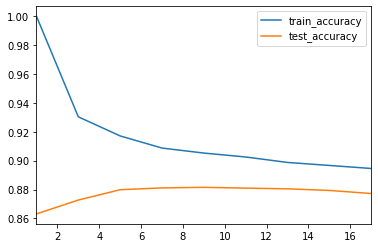

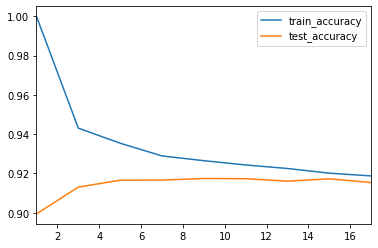

In [89]:
'''5.2, 5.4 - KNN on both the D1 and D2 dataset'''

# KNN on Dataset D1 -> 
######################

print("Dataframe D1 top few obs:\n", D1.head())


"Scaling the features"
std_scaler = StandardScaler()
X = D1.drop('label', axis=1)
y =  D1['label'] #label data
std_scaler.fit(X)
features_after_scaling = std_scaler.transform(X)
X_X = pd.DataFrame(features_after_scaling, columns = D1.columns[0:9])
X_X # features data

'''split in train and test data for D1 dataframe'''
print("\n")
X_X_train, X_X_test, y_train, y_test = train_test_split(X_X, y, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_X_train (predictors in train data):", X_X_train.shape)
print("shape of X_X_test (predictors in test data):", X_X_test.shape)
print("shape of y_train (response in train data):", y_train.shape)
print("shape of y_test (response in test data):", y_test.shape)



'''generate set of hyperparameter values (i.e. k values)'''
k_hyperparameter = [1]
for i in range(1,17):
    i = i + 2
    if i%2 != 0:
        k_hyperparameter.append(i) 

print("Values of k for D1 dataframe are:\n", k_hyperparameter)
print("\n")
#In below code, we are iterating over the different values of hyper parameter.

"accuracy on train dataset and test dataset. generate confusion matrices"
accuracy_trainset= [] 
accuracy_testset = []
for k_hyper in k_hyperparameter:
    knearest = KNeighborsClassifier(n_neighbors = k_hyper) # use KNeighborsClassifier() from scikit_learn module
    knearest.fit(X_X_train, y_train)  # fit on train data
    
    pred_train = knearest.predict(X_X_train) # predict on train data
    cm_train = confusion_matrix(y_train, pred_train)  # confusion matrix train data
    sum_diag_train = np.trace(cm_train, axis1 = 0, axis2 = 1) #  sum of diagonals in array
    
    pred_test = knearest.predict(X_X_test) # predict on test data
    cm_test = confusion_matrix(y_test, pred_test) # confusion matrix test data 
    sum_diag_test = np.trace(cm_test, axis1 = 0, axis2 = 1)  #  sum of diagonals in array
    
    accuracy_tr = sum_diag_train/cm_train.sum() # train accuracy
    accuracy_te = sum_diag_test/cm_test.sum() # test accuracy
    accuracy_trainset.append(accuracy_tr)
    accuracy_testset.append(accuracy_te)
    
knn_accuracy_measure_D1 = pd.DataFrame({'train_accuracy': accuracy_trainset, 'test_accuracy': accuracy_testset}, index = k_hyperparameter)
print("\n")
print("KNNN Accuracy Measures on D1:\n", knn_accuracy_measure_D1)



#KNN on dataset D2 -> 
#####################

print("\n")
print("Dataframe D2 top few obs:\n", D2.head())

"scaling the features"
std_scaler = StandardScaler()
X_D2 = D2.drop('label', axis=1)
y_D2 =  D2['label'] #label data
std_scaler.fit(X_D2)
features_after_scaling_D2 = std_scaler.transform(X_D2)
X_X_D2 = pd.DataFrame(features_after_scaling_D2, columns = D2.columns[0:9])
X_X_D2 # features data

"split in train and test data for D2 dataframe"
print("\n")
X_X_train_D2, X_X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_X_D2, y_D2, test_size=0.3, random_state= 11915048, shuffle = True)
print("shape of X_X_train_D2 (predictors in train data):", X_X_train_D2.shape)
print("shape of X_X_test_D2 (predictors in test data):", X_X_test_D2.shape)
print("shape of y_train_D2 (response in train data):", y_train_D2.shape)
print("shape of y_test_D2 (response in test data):", y_test_D2.shape)
print("\n")



"generate set of hyperparameter values (i.e. k values)"
k1_hyperparameter = [1]
for i in range(1,17):
    i = i + 2
    if i%2 != 0:
        k1_hyperparameter.append(i) 

print("Values of k for D2 dataframe are:\n", k1_hyperparameter)
print("\n")

accuracy_trainset_D2= [] 
accuracy_testset_D2 = []
for k_hyper in k1_hyperparameter:
    knearest = KNeighborsClassifier(n_neighbors = k_hyper)
    knearest.fit(X_X_train_D2, y_train_D2)  # fit on train data
    
    pred_train_D2 = knearest.predict(X_X_train_D2) # predict on train data
    cm_train_D2 = confusion_matrix(y_train_D2, pred_train_D2)  # confusion matrix train data
    sum_diag_train_D2 = np.trace(cm_train_D2, axis1 = 0, axis2 = 1) #  sum of diagonals in array
    
    pred_test_D2 = knearest.predict(X_X_test_D2) # predict on test data
    cm_test_D2 = confusion_matrix(y_test_D2, pred_test_D2) # confusion matrix test data 
    sum_diag_test_D2 = np.trace(cm_test_D2, axis1 = 0, axis2 = 1)  #  sum of diagonals in array
    
    accuracy_tr_D2 = sum_diag_train_D2/cm_train_D2.sum() # train accuracy
    accuracy_te_D2 = sum_diag_test_D2/cm_test_D2.sum() # test accuracy
    accuracy_trainset_D2.append(accuracy_tr_D2)
    accuracy_testset_D2.append(accuracy_te_D2)
    
knn_accuracy_measure_D2 = pd.DataFrame({'train_accuracy': accuracy_trainset_D2, 'test_accuracy': accuracy_testset_D2}, index = k1_hyperparameter)
print("KNN Accuracy Measures on D2 dataframe:\n", knn_accuracy_measure_D2) 
print("\n")

'''line plot-> x = k value; y = train data accuracy , test data accuracy'''
print("Line plot between traindata accuracy and test data accuracy for D1 and D2 dataframes:\n")
print(knn_accuracy_measure_D1.plot.line())
time.sleep(5)
print(knn_accuracy_measure_D2.plot.line())





# 5.3 & 5.4
D1 & D2 are the projected dataframe after implementing PCA and FDA respectively in above steps.
Below code is about 'Parzen window classifier' implementation  on D1 and D2 dataset.  -

In [90]:

'''5.3, 5.4 - Parzen Window Classifier on both the D1 and D2 dataset'''


# Parzen Window Classifier on Dataset D1 -> 
######################


"top few rows of D1 dataframe"
print("top few rows of D1 are:\n", D1. head())

"D1 features and labels data"
X_parzenD1 = D1.drop('label', axis=1) # features data
y_parzenD1 =  D1['label'] #label data


"split  D1 in train and test data"
X_parzenD1_train, X_parzenD1_test, y_parzenD1_train, y_parzenD1_test = train_test_split(X_parzenD1, y_parzenD1, test_size=0.3, random_state= 11915048, shuffle = True)

print("shape of X_parzenD1_train (predictors in train data):", X_parzenD1_train.shape)
print("shape of X_parzenD1_test (predictors in test data):", X_parzenD1_test.shape)
print("shape of y_parzenD1_train (response in train data):", y_parzenD1_train.shape)
print("shape of y_parzenD1_test (response in test data):", y_parzenD1_test.shape)


X_parzenD1_trainarr = np.array(X_parzenD1_train)  # will be used during prediction as a scoring function input argument.
X_parzenD1_testarr = np.array(X_parzenD1_test)  # will be used during prediction as a scoring function input argument.

"generate sigma values for D1 which is a hyper parameter "
sigma = []
for i in range(1,31):
    i = i/10
    sigma.append(i) 
sigma

hyperparameter_sigma_tuning_train = []
hyperparameter_sigma_tuning_test = []

'model fitting and scoring'
for j in sigma:
    predictedprob_tr = pd.DataFrame() # dataframe with predicted probs on train data for each class label. class labels as columns.Values are probability value in respective class.
    predictedprob_te = pd.DataFrame() # dataframe with predicted probs on test data for each class label
    for i in range(10): #range(10) since we have 10 class labels.
        labeldat = X_parzenD1_train[y_parzenD1_train == i] # subset train data for each class label
        labeldat_arr = np.array(labeldat) # array will be in input to kernel density function in following step.
        kerneldens = KD(kernel='gaussian', bandwidth=j, metric='euclidean').fit(labeldat_arr) # import kerneldensity() as KD
        logscore_tr = kerneldens.score_samples(X_parzenD1_trainarr) # predict on train data
        logscore_te = kerneldens.score_samples(X_parzenD1_testarr)  # predict on test data
        score_tr = np.exp(logscore_tr)
        score_te = np.exp(logscore_te) # convert log scores to original values
        print(i)
        predictedprob_tr = pd.concat([predictedprob_tr, pd.DataFrame(score_tr)], axis = 1) 
        predictedprob_te = pd.concat([predictedprob_te, pd.DataFrame(score_te)], axis = 1)
        #np.nonzero(score) # check whether any probabilities are non zero

    'predicted labels on train and test data'

    predictedprob_tr.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
    predictedlabels_tr = predictedprob_tr.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
    print("Max values(predicted labels) of top few observation in train data are:\n", predictedlabels_tr[0:5])


    predictedprob_te.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
    predictedlabels_te = predictedprob_te.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
    print("Max values(predicted labels) of top few observation in train data are:\n", predictedlabels_te[0:5])


    'accuracy measurement'
    trainaccuracy_pw_D1 = pd.DataFrame(list(zip(list(predictedlabels_tr), list(y_parzenD1_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
    trainaccuracy_pw_D1['predictedval_traindata'] = trainaccuracy_pw_D1['predictedval_traindata'].astype(int)
    trueevents = trainaccuracy_pw_D1[trainaccuracy_pw_D1.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
    #trueevents is a pandas dataframe which contains rows where all column values are same.
    traindata_accuracy_pw = (trueevents.shape[0]/y_parzenD1_train.shape[0])*100 # y_parzenD1_train.shape[0] = 29400
    print("Accuracy on D1 train data using parzen window is:\n", str(traindata_accuracy_pw) + " %")
    hyperparameter_sigma_tuning_train.append(traindata_accuracy_pw) 

    testaccuracy_pw_D1 = pd.DataFrame(list(zip(list(predictedlabels_te), list(y_parzenD1_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
    testaccuracy_pw_D1['predictedval_testdata'] = testaccuracy_pw_D1['predictedval_testdata'].astype(int)
    trueevents1 = testaccuracy_pw_D1[testaccuracy_pw_D1.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
    testdata_accuracy_pw = (trueevents1.shape[0]/y_parzenD1_test.shape[0])*100
    print("Accuracy on D1 test data using parzen window is:\n", str(testdata_accuracy_pw) + " %")
    hyperparameter_sigma_tuning_test.append(testdata_accuracy_pw)
    

top few rows of D1 are:
    projection0  projection1  projection2  projection3  projection4  \
0    -5.140478    -5.226445     3.887001    -0.901512    -4.929111   
1    19.292332     6.032996     1.308148    -2.383294    -3.095188   
2    -7.644503    -1.705813     2.289326     2.241135    -5.094426   
3    -0.474207     5.836139     2.008617     4.271106    -2.377777   
4    26.559574     6.024818     0.933179    -3.012645    -9.489179   

   projection5  projection6  projection7  projection8  label  
0    -2.035413    -4.706946     4.767184    -0.230958      1  
1     1.791095     3.772790    -0.153865     4.115192      0  
2     4.152058     1.012004    -1.732559    -0.436261      1  
3    -2.179913    -4.398030     0.353712    -0.992308      4  
4     2.331195     6.149597     1.783637     4.123302      0  
shape of X_parzenD1_train (predictors in train data): (29400, 9)
shape of X_parzenD1_test (predictors in test data): (12600, 9)
shape of y_parzenD1_train (response in train dat

0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4    5
dtype: object
Max values(predicted labels) of top few observation in train data are:
 0    4
1    6
2    7
3    5
4    3
dtype: object
Accuracy on D1 train data using parzen window is:
 93.96938775510205 %
Accuracy on D1 test data using parzen window is:
 87.45238095238095 %
0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4    5
dtype: object
Max values(predicted labels) of top few observation in train data are:
 0    4
1    6
2    7
3    5
4    3
dtype: object
Accuracy on D1 train data using parzen window is:
 93.22108843537414 %
Accuracy on D1 test data using parzen window is:
 87.13492063492063 %
0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4    5
dtype: object
Max values(predicted labels) of top few observation i

In [91]:
# Parzen Window Classifier on Dataset D2 -> 
######################



print("Top few rows of dataframe D2:\n", D2.head())
print("\n")
X_parzenD2 = D2.drop('label', axis=1) # features data
y_parzenD2 =  D2['label'] #label data


"split D2 dataframe in train and test data"
X_parzenD2_train, X_parzenD2_test, y_parzenD2_train, y_parzenD2_test = train_test_split(X_parzenD2, y_parzenD2, test_size=0.3, random_state= 11915048, shuffle = True)

print("shape of X_parzenD2_train (predictors in train data):", X_parzenD2_train.shape)
print("shape of X_parzenD2_test (predictors in test data):", X_parzenD2_test.shape)
print("shape of y_parzenD2_train (response in train data):", y_parzenD2_train.shape)
print("shape of y_parzenD2_test (response in test data):", y_parzenD2_test.shape)


X_parzenD2_trainarr = np.array(X_parzenD2_train)  # will be used during prediction as a scoring function input argument.
X_parzenD2_testarr = np.array(X_parzenD2_test)  # will be used during prediction as a scoring function input argument.

"generate sigma values for D2 dataframe"
sigma = []
for i in range(1,31):
    i = i/10
    sigma.append(i) 
sigma

hyperparameter_sigma_tuning_train_D2 = []
hyperparameter_sigma_tuning_test_D2 = []

'model fitting and scoring for D2 dataframe'
for j in sigma:
    predictedprob_tr = pd.DataFrame() # dataframe with predicted probs on train data for each class label. class labels as columns.Values are probability value in respective class.
    predictedprob_te = pd.DataFrame() # dataframe with predicted probs on test data for each class label
    for i in range(10): #range(10) since we have 10 class labels.
        labeldat = X_parzenD2_train[y_parzenD2_train == i] # subset train data for each class label
        labeldat_arr = np.array(labeldat) # array will be in input to kernel density function in following step.
        kerneldens = KD(kernel='gaussian', bandwidth=j, metric='euclidean').fit(labeldat_arr) # import kerneldensity() as KD
        logscore_tr = kerneldens.score_samples(X_parzenD2_trainarr) # predict on train data
        logscore_te = kerneldens.score_samples(X_parzenD2_testarr)  # predict on test data
        score_tr = np.exp(logscore_tr)
        score_te = np.exp(logscore_te)
        print(i)
        predictedprob_tr = pd.concat([predictedprob_tr, pd.DataFrame(score_tr)], axis = 1) 
        predictedprob_te = pd.concat([predictedprob_te, pd.DataFrame(score_te)], axis = 1)
        #np.nonzero(score) # check whether any probabilities are non zero

    'predicted labels on train and test data'

    predictedprob_tr.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
    predictedlabels_tr = predictedprob_tr.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
    print("Max values(predicted labels) of top few observation in train data are:\n", predictedlabels_tr[0:5])


    predictedprob_te.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] # assign column names = class labels in our data
    predictedlabels_te = predictedprob_te.idxmax(axis=1, skipna=True) # get the max value in row and column name corresponding to that maximum rowvalue.
    print("Max values(predicted labels) of top few observation in train data are:\n", predictedlabels_te[0:5])


    'accuracy measurement'
    trainaccuracy_pw_D2 = pd.DataFrame(list(zip(list(predictedlabels_tr), list(y_parzenD2_train))), columns =['predictedval_traindata', 'actuallabel_traindata'])
    trainaccuracy_pw_D2['predictedval_traindata'] = trainaccuracy_pw_D2['predictedval_traindata'].astype(int)
    trueevents = trainaccuracy_pw_D2[trainaccuracy_pw_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
    #trueevents is a pandas dataframe which contains rows where all column values are same.
    traindata_accuracy_pw = (trueevents.shape[0]/y_parzenD2_train.shape[0])*100 # 
    print("Accuracy on D2 train data using parzen window is:\n", str(traindata_accuracy_pw) + " %")
    hyperparameter_sigma_tuning_train_D2.append(traindata_accuracy_pw) 

    testaccuracy_pw_D2 = pd.DataFrame(list(zip(list(predictedlabels_te), list(y_parzenD2_test))), columns =['predictedval_testdata', 'actuallabel_testdata'])
    testaccuracy_pw_D2['predictedval_testdata'] = testaccuracy_pw_D2['predictedval_testdata'].astype(int)
    trueevents1 = testaccuracy_pw_D2[testaccuracy_pw_D2.apply(lambda rowval: min(rowval) == max(rowval), 1)] # Take out rows where values in a row are same for all the columns. 
    testdata_accuracy_pw = (trueevents1.shape[0]/y_parzenD2_test.shape[0])*100
    print("Accuracy on D2 test data using parzen window is:\n", str(testdata_accuracy_pw) + " %")
    hyperparameter_sigma_tuning_test_D2.append(testdata_accuracy_pw)
    

Top few rows of dataframe D2:
    projection0  projection1  projection2  projection3  projection4  \
0     0.706982     3.702191    -0.546160     1.083590    -1.282057   
1    -4.753373    -3.257093    -2.983682    -1.244001    -1.880934   
2     0.426475     5.168707    -0.215028     0.248895    -3.737808   
3    -0.978410    -0.555503     1.147945    -0.324528    -0.997568   
4    -4.878184    -3.244367    -4.723876    -0.850046    -1.923177   

   projection5  projection6  projection7  projection8  label  
0    -0.640238    -0.161646     0.711746     0.098052      1  
1    -0.898564     0.114414    -1.097409     1.235790      0  
2     0.168903     0.546867     0.164058    -0.314798      1  
3    -0.858390     0.979497     1.846044    -0.207963      4  
4    -2.093587     0.166724    -2.228554     0.999328      0  


shape of X_parzenD2_train (predictors in train data): (29400, 9)
shape of X_parzenD2_test (predictors in test data): (12600, 9)
shape of y_parzenD2_train (response in t

Accuracy on D2 test data using parzen window is:
 87.86507936507937 %
0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4    3
dtype: object
Max values(predicted labels) of top few observation in train data are:
 0    4
1    6
2    7
3    5
4    3
dtype: object
Accuracy on D2 train data using parzen window is:
 87.45918367346938 %
Accuracy on D2 test data using parzen window is:
 87.73015873015872 %
0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4    3
dtype: object
Max values(predicted labels) of top few observation in train data are:
 0    4
1    6
2    7
3    5
4    3
dtype: object
Accuracy on D2 train data using parzen window is:
 87.28911564625851 %
Accuracy on D2 test data using parzen window is:
 87.59523809523809 %
0
1
2
3
4
5
6
7
8
9
Max values(predicted labels) of top few observation in train data are:
 0    2
1    3
2    3
3    9
4   

In [99]:
sigma_train_test_accD1_df = pd.DataFrame(list(zip(list(sigma),list(hyperparameter_sigma_tuning_train), list(hyperparameter_sigma_tuning_test))), columns =['sigmavalue', 'train_acc', 'test_acc'])
print("Sigma, Train and Test Accuracy on  D1 after Parzen Window Classifier:\n", sigma_train_test_accD1_df)
print("\n")
sigma_train_test_accD2_df = pd.DataFrame(list(zip(list(sigma),list(hyperparameter_sigma_tuning_train_D2), list(hyperparameter_sigma_tuning_test_D2))), columns =['sigmavalue', 'train_acc', 'test_acc'])
print("Sigma, Train and Test Accuracy on  D2 after Parzen Window Classifier:\n", sigma_train_test_accD2_df)

Sigma, Train and Test Accuracy on  D1 after Parzen Window Classifier:
     sigmavalue   train_acc   test_acc
0          0.1  100.000000  41.722222
1          0.2  100.000000  43.261905
2          0.3  100.000000  53.079365
3          0.4  100.000000  66.674603
4          0.5  100.000000  76.428571
5          0.6   99.993197  82.198413
6          0.7   99.979592  84.801587
7          0.8   99.962585  86.261905
8          0.9   99.897959  87.071429
9          1.0   99.717687  87.452381
10         1.1   99.360544  87.690476
11         1.2   98.948980  87.833333
12         1.3   98.472789  87.992063
13         1.4   97.874150  87.992063
14         1.5   97.163265  87.920635
15         1.6   96.380952  87.841270
16         1.7   95.523810  87.833333
17         1.8   94.690476  87.746032
18         1.9   93.969388  87.452381
19         2.0   93.221088  87.134921
20         2.1   92.479592  86.944444
21         2.2   91.714286  86.603175
22         2.3   90.911565  86.365079
23         2.4   

### 5.5 Comment on optimal k and sigma. Compare classifiers across D1 and D2 datasets

'''5.5 - Optimal K and Optimal Sigma. And comparision of classifiers across D1 and D2 datasets'''

[Observation & Insights: KNN Implementation]

KNN (Optimal K value) -

For D1 dataset - 
Optimal K for D1 dataset = 9. Since, at K = 9, train dataset accuracy = 0.905238 i.e. ~90% and test data accuracy  =  0.881508 i.e. ~88%.
Higher than K=9, test data accuracy falls.Hence, K = 9 is optimal K value for D1 where we obtain best train and test accuracy.

For D2 dataset- 
Optimal K for D2 dataset = 11. Since, at K = 11, train dataset accuracy = 0.924286 i.e. ~92% and test data accuracy  =  0.917302 i.e. ~91%.
Higher than K=11, test data accuracy falls.Hence, K = 11 is optimal K value for D2 where we obtain test and train accuracies best and are closer to each other.

Overall,  
we see that upon [KNN implementation] on the [D2 dataframe] (i.e.D2 dataframe as a result of FDA projection on  MNIST data), we obtain [higher test accuracies]. i.e. ranging from 90% to 91.5% as compared to KNN implementation on D1(PCA projection on MNIST data).


[Observation & Insights: Parzen Window Classifier Implementation]

Parzen Window Classifier (Optimal sigma value) -

For D1 dataset - 

At sigma = 1.4
Accuracy on D1 train data using parzen window is:
 97.87414965986395 %
Accuracy on D1 test data using parzen window is:
 87.9920634920635 %
 
 
At sigma = 0.6
Accuracy on D2 train data using parzen window is:
 98.30952380952381 %
Accuracy on D2 test data using parzen window is:
 91.8015873015873 %

Overall,  
we see that upon [Parzen Window Classifier implementation] on the [D2 dataframe] (i.e.D2 dataframe as a result of FDA projection on  MNIST data), we obtain [higher test accuracies]. 


D2 has higher test accuracies for both the classifiers
   


### Solution 6 => News Group Text Classifier

In [101]:
''' read all the 20 text data files'''

#atheism -
atheism = pd.read_csv("alt.atheism.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False) 
atheism.columns = ['text']
atheism['class'] = 'atheism'

#computer -

comp_graphics = pd.read_csv("comp.graphics.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
comp_graphics.columns = ['text']
comp_graphics['class'] = 'comp_graphics'

comp_os_windows_misc = pd.read_csv("comp.os.ms-windows.misc.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
comp_os_windows_misc.columns = ['text']
comp_os_windows_misc['class'] = 'comp_os_windows_misc'

comp_sys_ibm_pc_hardware = pd.read_csv("comp.sys.ibm.pc.hardware.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
comp_sys_ibm_pc_hardware.columns = ['text']
comp_sys_ibm_pc_hardware['class'] = 'comp_sys_ibm_pc_hardware'

comp_sys_mac_hardware = pd.read_csv("comp.sys.mac.hardware.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
comp_sys_mac_hardware.columns = ['text']
comp_sys_mac_hardware['class'] = 'comp_sys_mac_hardware'

comp_windows_x = pd.read_csv("comp.windows.x.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
comp_windows_x.columns = ['text']
comp_windows_x['class'] = 'comp_windows_x'


# real estate -
misc_forsale = pd.read_csv("misc.forsale.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
misc_forsale.columns = ['text']
misc_forsale['class'] = 'misc_forsale'


# automobile -
rec_autos = pd.read_csv("rec.autos.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
rec_autos.columns = ['text']
rec_autos['class'] = 'rec_autos'

rec_motorcycles = pd.read_csv("rec.motorcycles.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
rec_motorcycles.columns = ['text']
rec_motorcycles['class'] = 'rec_motorcycles'

# sports -
rec_sport_baseball = pd.read_csv("rec.sport.baseball.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
rec_sport_baseball.columns = ['text']
rec_sport_baseball['class'] = 'rec_sport_baseball'

rec_sport_hockey = pd.read_csv("rec.sport.hockey.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
rec_sport_hockey.columns = ['text']
rec_sport_hockey['class'] = 'rec_sport_hockey'


#science - 

sci_crypt = pd.read_csv("sci.crypt.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
sci_crypt.columns = ['text']
sci_crypt['class'] = 'sci_crypt'

sci_electronics = pd.read_csv("sci.electronics.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
sci_electronics.columns = ['text']
sci_electronics['class'] = 'sci_electronics'


sci_med = pd.read_csv("sci.med.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
sci_med.columns = ['text']
sci_med['class'] = 'sci_med'


sci_space = pd.read_csv("sci.space.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
sci_space.columns = ['text']
sci_space['class'] = 'sci_space'


# religion -

soc_religion_christian = pd.read_csv("soc.religion.christian.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
soc_religion_christian.columns = ['text']
soc_religion_christian['class'] = 'soc_religion_christian'



# politics -

talk_politics_guns = pd.read_csv("talk.politics.guns.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1', warn_bad_lines=False)
talk_politics_guns.columns = ['text']
talk_politics_guns['class'] = 'talk_politics_guns'


talk_politics_mideast = pd.read_csv("talk.politics.mideast.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
talk_politics_mideast.columns = ['text']
talk_politics_mideast['class'] = 'talk_politics_mideast'


talk_politics_misc = pd.read_csv("talk.politics.misc.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
talk_politics_misc.columns = ['text']
talk_politics_misc['class'] = 'talk_politics_misc'


talk_religion_misc = pd.read_csv("talk.religion.misc.txt", sep = '\t', error_bad_lines=False, encoding = 'latin1',  warn_bad_lines=False)
talk_religion_misc.columns = ['text']
talk_religion_misc['class'] = 'talk_religion_misc'




In [169]:
"create dataframe by concatanating all the data files"


textdf = pd.concat([atheism,comp_graphics, comp_os_windows_misc, comp_sys_ibm_pc_hardware, comp_sys_mac_hardware, comp_windows_x,
                   misc_forsale, rec_autos, rec_motorcycles,  rec_sport_baseball, rec_sport_hockey, sci_crypt, 
                    sci_electronics, sci_med, sci_space, soc_religion_christian, talk_politics_guns, talk_politics_mideast, 
                    talk_politics_misc, talk_religion_misc]).reset_index()


"create text data with columns 'text' and 'class' "
textdf = textdf.drop(['index'], axis = 1)

textdf.head()


,text,class
0,Subject: Alt.Atheism FAQ: Atheist Resources,atheism
1,Archive-name: atheism/resources,atheism
2,Alt-atheism-archive-name: resources,atheism
3,Last-modified: 11 December 1992,atheism
4,Version: 1.0,atheism


In [170]:
'''create a function for text cleaning and prepare text data'''

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def textClean(text0): 
    text1 = [strip_punctuation(doc) for doc in text0]
    text1 = [strip_tags(doc) for doc in text1]
    text1 = [strip_numeric(doc) for doc in text1]
    text1 = [[" ".join([i for i in doc.lower().split() if i not in stop_words])] for doc in text1]
    ct = [[" ".join([lemma.lemmatize(word) for word in ' '.join(doc).split()])] for doc in text1]
    return ct
    
corpus0 = textClean(textdf['text'])# use textClean() for text data cleaning of column 'text' in textdf .
textdf['cleanedtext'] = corpus0
textdf['cleanedtext1'] = textdf['cleanedtext'].str[0]  # convert column values to string
textdf['cleanedtext1'] = textdf['cleanedtext1'].astype(str)


textdf = textdf[['class', 'cleanedtext1']]
textdf.head()

,class,cleanedtext1
0,atheism,subject alt atheism faq atheist resource
1,atheism,archive name atheism resource
2,atheism,alt atheism archive name resource
3,atheism,last modified december
4,atheism,version


In [167]:
"Approach 1"

#import required libraries
from sklearn import model_selection, preprocessing, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn import ensemble

# split textdf into train and test datasets
train_x, test_x, train_y, test_y = model_selection.train_test_split(textdf['cleanedtext1'], textdf['class'], random_state = 11915048)

# encode response variable in train and test data.
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

# create a count vectorizer TF-DTM object 
vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',  lowercase=True, preprocessor=None,  max_df=1.0, min_df=1)
vect.fit(textdf['cleanedtext1'])


# transform the training and test data using count vectorizer object
train_mat =  vect.transform(train_x)
test_mat =  vect.transform(test_x)



"Fit model and set laplace smoothing parameter , obtain the accuracy for test data"

def mod(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    #print(len(predictions))
    pred = pd.DataFrame()
    pred['text'] = test_x
    pred['actual_category'] = test_y
    pred['pred_category'] = predictions
    
    print(pred.iloc[:8,])
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, test_y)

#Naive Bayes on dtm matrix
#set alpha = 30 which is for laplace smoothing and that is required to handle zero probabilities issues while computation.
acc_nb_test = mod(naive_bayes.MultinomialNB(alpha= 30), train_mat, train_y, test_mat)# acc on train data

print("\nAccuracy_Test data: "+ str(acc_nb_test))
     
    
    
    
    
"Fit model and set laplace smoothing parameter , obtain the accuracy for train data"

clf = MultinomialNB(alpha = 30) # add alpha = 30 for laplace smoothing
clf.fit(train_mat, train_y)  # fit model
pred = clf.predict(train_mat) # predict values for train dataset.
acc_nb_train = metrics.accuracy_score(pred, train_y) # get the accuracy scores.

print("\nAccuracy_Train data: "+ str(acc_nb_train))
     
    
#Accuracy on train data  = 45.31%
#Accuracy on test data = 44.4%
'''
please note - that the above code part and train_model() function
is referred from lms tutorial of term 1 (residency 2) by sudhir sir - text mining session#5 
'Text Classification on Amazon Reviews.html'. 
'''

                                                text  actual_category  \
925267           offended christian claim know truth               15   
1168755              include vat previous level sale               18   
253731       mklj v ax ax ax ax ax ax ax ax ax ax ax                2   
835611   hmmm look like reference passive aggressive               13   
457784       pedestrian bridge fencing curl sidewalk                7   
974483                                                             15   
12908              likely affect thinking msee focus                0   
21535                                             uk                0   

         pred_category  
925267              15  
1168755             18  
253731               2  
835611               0  
457784               7  
974483              17  
12908                0  
21535                0  

Accuracy_Test data: 0.44408583637245846

Accuracy_Train data: 0.4531900706748072


"\nplease note - that the above code part and train_model() function\nis referred from lms tutorial of term 1 (residency 2) by sudhir sir - text mining session#5 \n'Text Classification on Amazon Reviews.html'. \n"

In [ ]:

"Approach 2"

'''split in train and test data'''

X_textclf= textdf.drop(['text', 'class', 'cleanedtext'], axis=1) # features data i.e. cleanedtext1
y_textclf =  textdf['class'] #labels data

X_textclf_train, X_textclf_test, y_textclf_train, y_textclf_test = train_test_split(X_textclf, y_textclf, test_size=0.4, random_state= 11915048, shuffle = True)

print("shape of X_textclf_train (predictors in train data):", X_textclf_train.shape)
print("shape of X_textclf_test (predictors in test data):", X_textclf_test.shape)
print("shape of y_textclf_train (response in train data):", y_textclf_train.shape)
print("shape of y_textclf_test (response in test data):", y_textclf_test.shape)
print("\n")
corpus1 = X_textclf_train['cleanedtext1'] # create corpus using train data
print(corpus1[0:5])
corpus2 = list(corpus1)  # train data corpus 
corpus2[0:5]



'''Build corpus data of words in a single string'''
#corpustest  - a single string containing all documents
corpustest = ' '.join([elem for elem in corpus2])
print("First few words from corpus\n", corpustest[0:500])


In [117]:
' generate list of unique terms in all the documents'

import re
corpustest11 = re.sub(r'\b\w{1,2}\b', '', corpustest)  # remove words with length 1 to 2 from corpus
tokenizedcorpustest11 = corpustest11.split() # tokenize words
tokenizedcorpustestdf11 = pd.DataFrame(tokenizedcorpustest11, columns = ['tokens']) # create dataframe of terms in all the documents

print("\n")
print("Count of unique terms are \n", tokenizedcorpustestdf11.shape[0])
unique_tokens_arr11 = tokenizedcorpustestdf11['tokens'].unique() # get the unique terms in the documents
unique_tokens_lst11= unique_tokens_arr11.tolist() # convert array of unique terms to list of unique terms for simplicity

print("\n")
print("First 10 unique terms are\n",unique_tokens_lst11[0:10])
print(len(unique_tokens_lst11))



Count of unique terms are 
 3399548


First 10 unique terms are
 ['look', 'guy', 'problem', 'want', 'light', 'pljdd', 'without', 'extremely', 'sick', 'pissed']
102004


In [ ]:
'term frequency- total frequency of each of unique term in documents'


tokenfreq11 = []
for i in range(len(unique_tokens_lst11)):
    test1 = corpustest11.count(unique_tokens_lst11[i])
    tokenfreq11.append(test1)


print("frequency of first few unique terms are as follows:\n", tokenfreq11[0:10])
print("\n")

'''create dataframe with terms and their respective term frequency'''

termfrequency1 = pd.DataFrame(list(zip(unique_tokens_lst11, tokenfreq11)), columns =['uniquetokens', 'termfrequency'])
print("Top few obs from dataframe of terms and their respective term frequency is as follows:\n", termfrequency1.head(10))
print("\n")


'''sort the data by descending order of term frequency'''
termfrequency1sorted = termfrequency1.sort_values(by = 'termfrequency', ascending = False)
print("\n")


'''pick top 5000 terms with highest term frequency'''

top5000termsdf = termfrequency1sorted.head(5000)
top5000terms = list(top5000termsdf['uniquetokens'])
top5000termfreq = list(top5000termsdf['termfrequency'])

top5000termsdict = {top5000terms[i]: top5000termfreq[i] for i in range(len(top5000terms))} # dictionary of top 5000 words
print("Some random terms from top 5000 terms:\n", top5000terms[2000:2020])
print("\n")


'''pick top 10000 terms with highest term frequency'''

top10000termsdf = termfrequency1sorted.head(10000)
top10000terms = list(top10000termsdf['uniquetokens'])
top10000termfreq = list(top10000termsdf['termfrequency'])

top10000termsdict = {top10000terms[i]: top10000termfreq[i] for i in range(len(top10000terms))} # dictionary of top 10000 words
print("Some random terms from top 10000 terms:\n", top10000terms[6000:6020])




################################################### ***************** ########################################

Solution -7 - Pair Wise Classifier Features

In [7]:
'load mnist data'

mnist = pd.read_csv("train.csv") # import digits data
print("Top few rows of dataset:\n", mnist.head())
print("\n")
print("Data Class labels:", mnist.label.unique())
mnist.label.unique()

Top few rows of dataset:
    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0   

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [11]:
'compute fisher discriminant for each pair of class and convert them to image '
for k in range(0,10):  # since there are 10 classes.
    for i in range(0,10):
        if  k != i and k > i:  # exclude where class labels are equal(hence k!=i) and overalapping(hence K>i)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            options = [mnist.label.unique()[k], mnist.label.unique()[i]]   # create a list of a pair of classes. 

            temp_df = mnist[mnist['label'].isin(options)]  # create dataframe which contains selected class pair.
            temp_df1 = temp_df.drop(['label'], axis=1)
            df1 = temp_df1[temp_df['label']== mnist.label.unique()[k]]   
            df1.var()         #compute variance of each feature in dataframe (first selected class label)
            df2 = temp_df1[temp_df['label']== mnist.label.unique()[i]]
            df2.var()         #compute variance of each feature in dataframe ( second selected class label )
            
            'omit out features where- sum of variance of features for two classes is zero'
            t1 = df1.var().add(df2.var(), fill_value=0)
            t2 = t1.nonzero() #pixels with sum as non zero variance.  # 
            t3 = t1.iloc[t2] 
            columns = list(t3.index)

            columns = columns + ['label']
            temp_df2 = temp_df[columns]  # master dataframe
            temp_df22 = temp_df2.drop(columns=['label'])
            predictors = temp_df22.values
            predictors= predictors + np.random.uniform(0.00001,0.0001,[predictors.shape[0],predictors.shape[1]])  
            #add very small random noise to avoid singular matrix error.
            #predictors
            response = temp_df2['label']
            warnings.filterwarnings("ignore")
            sklearn_lda = LDA(solver = 'eigen',n_components=2) #solver = 'eigen' # apply LDA 
            model = sklearn_lda.fit(predictors,response) # fit model on train data
            X_lda_sklearn = model.fit_transform(predictors,response) 
            X_lda_sklearn.shape
            #X_lda_sklearn
            #Image.fromarray(np_im)
            X_lda_sklearn /= 255.0  # normalise/scale the pixels by dividing by 255.0
            X_lda_sklearn
            
            'to get the values to be feeded into reshape()'
            multiples = []
            for j in range (1,100):
                a = X_lda_sklearn.shape[0] % j == 0
                if a:
                    multiples.append(j)

            'find multiples'
            m1 = int(multiples[-1])
            m2= int(X_lda_sklearn.shape[0]/m1)
            
            'convert array to image and save in directory'
            a = Image.fromarray(X_lda_sklearn.reshape(m1,m2), 'RGB')#'L'
            a.save('img' + str(k) + str(i) + '.png')  # save the image to directory. 
            time.sleep(2)
            


C:\Users\NJ077229\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  from ipykernel import kernelapp as app


Solution -8 - Binary Hierarchical Classifier

In [21]:
'load mnist data'
mnist = pd.read_csv("train.csv") # import digits data
print("Top few rows of dataset:\n", mnist.head())
print("\n")
print("Data Class labels:", mnist.label.unique())
mnist['label'] = mnist['label'].astype(str)

Top few rows of dataset:
    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0   

In [22]:
def compute_training_error(data):
    training_error = [] 
    pair = []   #appen class pair
    pair1 = [] # append class label from class pair
    pair2 = [] # append other class label from class pair
    maxrange = len(data.label.unique()) #loop will run each time for number of times, uniques class labels are present in data
    for k in range(0,maxrange):
        for i in range(0,maxrange):
            if  k != i and k > i:
                warnings.filterwarnings("ignore", category=DeprecationWarning)
                options = [data.label.unique()[k], data.label.unique()[i]] 

                temp_df = data[data['label'].isin(options)]
                inp = temp_df.drop('label', axis=1)
                res = temp_df['label']
                inp1 = inp/255.0
                #test_data = res/255.0

                inp1_scaled = scale(inp1) # scale the input data to unit variance

                X_train, X_test, y_train, y_test  = train_test_split(inp1_scaled, res, test_size = 0.30, random_state = 11915048)

                classifier = SVC(kernel='linear', C= 0.01)  # apply Support vector classifer and choose kernel 'linear'
                #kernel linear will try to fit a best decision boundary between the two classes.
                classifier.fit(X_train, y_train)
                trainy_predicted= classifier.predict(X_train)
                testy_predicted= classifier.predict(X_test)
                            #conf_mat = confusion_matrix(y_test, testy_predicted)
                            #testerror = (conf_mat[1][0] + conf_mat[0][1])/(conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1])
                            #testerror 
                conf_mat = confusion_matrix(y_train, trainy_predicted) 
                pr = str(data.label.unique()[k]) +  '_' + str(data.label.unique()[i])
                te = (conf_mat[1][0] + conf_mat[0][1])/(conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1])
               
                
                pair1.append(str(data.label.unique()[k]))
                pair2.append(str(data.label.unique()[i]))
                training_error.append(te)
                pair.append(pr)
            

    return training_error, pair, pair1, pair2

In [23]:
def prepare_data(data, pairlist, training_errorlist, pair1, pair2):
    data['label'] = data['label'].astype(str) 

    training_error_pairs = pd.DataFrame(list(zip(pairlist, training_errorlist, pair1, pair2)), 
                                        columns =['pair', 'training_error', 'class1', 'class2'])

    high_training_error = training_error_pairs[training_error_pairs.training_error == training_error_pairs.training_error.max()]
    training_error_pairs.head()         
    e1 = high_training_error.class1.values[0]
    e2 = high_training_error.class2.values[0]
    temp_df = data[data['label'].isin([e1, e2])] # changed
    temp_df['label'] = temp_df['label'].astype(str)
    temp_df['label'] = temp_df['label'].replace([e1, e2], str(e1 + '_' + e2))

    data_subset = data.loc[~data['label'].isin([e1,e2])]  #changed 
    merge_data= data_subset.append(temp_df, ignore_index=True)  # changed
    merge_data.label.unique()
    return merge_data

In [24]:
'find training error for all pair and the names of classes forming a pair'
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(mnist)

'get the pair with maximum training error and merge both the labels, rename labels, and append with rest other labelled data'
merge_data = prepare_data(mnist, pair, training_error, pair1, pair2)
merge_data.label.unique()

array(['1', '0', '4', '3', '5', '8', '2', '6', '9_7'], dtype=object)

In [25]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data)
merge_data1 = prepare_data(merge_data, pair, training_error, pair1, pair2)
merge_data1.label.unique()

array(['1', '0', '4', '8', '2', '6', '9_7', '5_3'], dtype=object)

In [26]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data1)
merge_data2 = prepare_data(merge_data1, pair, training_error, pair1, pair2)
merge_data2.label.unique()

array(['1', '0', '4', '2', '6', '9_7', '5_3_8'], dtype=object)

In [27]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data2)
merge_data3 = prepare_data(merge_data2, pair, training_error, pair1, pair2)
merge_data3.label.unique()

array(['1', '0', '4', '6', '9_7', '5_3_8_2'], dtype=object)

In [28]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data3)
merge_data4 = prepare_data(merge_data3, pair, training_error, pair1, pair2)
merge_data4.label.unique()

array(['1', '0', '6', '5_3_8_2', '9_7_4'], dtype=object)

In [29]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data4)
merge_data5 = prepare_data(merge_data4, pair, training_error, pair1, pair2)
merge_data5.label.unique()

array(['1', '0', '6', '9_7_4_5_3_8_2'], dtype=object)

In [30]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data5)
merge_data6 = prepare_data(merge_data5, pair, training_error, pair1, pair2)
merge_data6.label.unique()

array(['1', '0', '9_7_4_5_3_8_2_6'], dtype=object)

In [31]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data6)
merge_data7 = prepare_data(merge_data6, pair, training_error, pair1, pair2)
merge_data7.label.unique()

array(['0', '9_7_4_5_3_8_2_6_1'], dtype=object)

In [32]:
warnings.filterwarnings("ignore")
training_error, pair, pair1, pair2  = compute_training_error(merge_data7)
merge_data8 = prepare_data(merge_data7, pair, training_error, pair1, pair2)
merge_data8.label.unique()

array(['9_7_4_5_3_8_2_6_1_0'], dtype=object)

In [33]:
print(merge_data.label.unique())
print(merge_data1.label.unique())
print(merge_data2.label.unique())
print(merge_data3.label.unique())
print(merge_data4.label.unique())
print(merge_data5.label.unique())
print(merge_data6.label.unique())
print(merge_data7.label.unique())
print(merge_data8.label.unique())

['1' '0' '4' '3' '5' '8' '2' '6' '9_7']
['1' '0' '4' '8' '2' '6' '9_7' '5_3']
['1' '0' '4' '2' '6' '9_7' '5_3_8']
['1' '0' '4' '6' '9_7' '5_3_8_2']
['1' '0' '6' '5_3_8_2' '9_7_4']
['1' '0' '6' '9_7_4_5_3_8_2']
['1' '0' '9_7_4_5_3_8_2_6']
['0' '9_7_4_5_3_8_2_6_1']
['9_7_4_5_3_8_2_6_1_0']


With the above tree structure, we observe that - 
1 training error is high when all the class labels are present in data. 
2 It is decreasing in bottom up strcture where we observe that class label 0 has less training error compared to rest of 
classes combined.

# References: 

In [ ]:
#References:
'''
https://github.com/rvempati/Supervised-Learning/blob/master/Linear%20Discriminant%20Analysis.ipynb 
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html  # references for plots
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

'''
